In [16]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [17]:
# from numpy.random import seed
# seed(1)

# from tensorflow import random
# random.set_seed(2)

In [18]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

MSFT_open  MSFT_high  MSFT_low  MSFT_close  AMD_open  AMD_high  \
2010-06-29      24.13      24.20    23.110       23.31      7.93      7.93   
2010-06-30      23.30      23.68    22.950       23.01      7.58      7.65   
2010-07-01      23.09      23.32    22.730       23.16      7.35      7.53   
2010-07-02      23.36      23.48    23.050       23.27      7.45      7.48   
2010-07-06      23.70      24.09    23.584       23.82      7.40      7.42   

            AMD_low  AMD_close  TSLA_open  TSLA_high  ...  JNJ_low  JNJ_close  \
2010-06-29     7.41       7.48      19.00    25.0000  ...   58.680      59.24   
2010-06-30     7.30       7.32      25.79    30.4192  ...   58.940      59.06   
2010-07-01     7.10       7.39      25.00    25.9200  ...   58.650      59.07   
2010-07-02     7.02       7.17      23.00    23.1000  ...   58.850      59.08   
2010-07-06     6.96       7.04      20.00    20.0000  ...   58.669      59.08   

            REGN_open  REGN_high  REGN_low  REGN_close  GILD_open  GILD_high  \
2010-06-29      23.67      23.95     22.86       22.98      35.40      35.61   
2010-06-30      23.05      23.47     22.32       22.32      34.83      35.13   
2010-07-01      22.31      22.37     20.45       20.79      34.24      34.27   
2010-07-02      21.06      21.88     20.75       21.61      34.38      35.16   
2010-07-06      22.03      22.03     21.16       21.36      35.11      35.42   

            GILD_low  GILD_close  
2010-06-29    34.740       34.97  
2010-06-30    34.260       34.28  
2010-07-01    33.300       34.14  
2010-07-02    34.180       34.87  
2010-07-06    34.415       34.77  

[5 rows x 24 columns]

In [19]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AMD_open',
    'AMD_high',
    'AMD_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

MSFT_close  AMD_close  TSLA_close  JNJ_close  REGN_close  \
2010-06-29       23.31       7.48       23.89      59.24       22.98   
2010-06-30       23.01       7.32       23.83      59.06       22.32   
2010-07-01       23.16       7.39       21.96      59.07       20.79   
2010-07-02       23.27       7.17       19.20      59.08       21.61   
2010-07-06       23.82       7.04       16.11      59.08       21.36   

            GILD_close  
2010-06-29       34.97  
2010-06-30       34.28  
2010-07-01       34.14  
2010-07-02       34.87  
2010-07-06       34.77

In [20]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
train_test_columns = [
    'stock',
    'window size',
    'dropout fraction',
    'mse',
    'rmse'
]
train_test_eval = pd.DataFrame(columns=train_test_columns)

window size: 1
stock: MSFT_close
dropout fraction: 0.1
MSE:968.6695300633776
RMSE:31.12345626795613
window size: 1
stock: MSFT_close
dropout fraction: 0.15
MSE:695.1233988820469
RMSE:26.36519294224958
window size: 1
stock: MSFT_close
dropout fraction: 0.2
MSE:937.0063140294718
RMSE:30.610558865030082
window size: 1
stock: MSFT_close
dropout fraction: 0.25
MSE:5704.164754640534
RMSE:75.52592107773684
window size: 1
stock: MSFT_close
dropout fraction: 0.3
MSE:1743.5016892357967
RMSE:41.755259420051466
window size: 1
stock: MSFT_close
dropout fraction: 0.35
MSE:2285.4431456855714
RMSE:47.80630863898165
window size: 5
stock: MSFT_close
dropout fraction: 0.1
MSE:169.01291193608677
RMSE:13.000496603441222
window size: 5
stock: MSFT_close
dropout fraction: 0.15
MSE:179.2949832858894
RMSE:13.390107665209023
window size: 5
stock: MSFT_close
dropout fraction: 0.2
MSE:95.12679974936361
RMSE:9.753296865643104
window size: 5
stock: MSFT_close
dropout fraction: 0.25
MSE:197.6221258757111
RMSE:14.057

/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.25
MSE:127.44304422022348
RMSE:11.289067464597043


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.3
MSE:207.11583637771395
RMSE:14.391519599323553


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: MSFT_close
dropout fraction: 0.35
MSE:81.14171637415227
RMSE:9.007869691228457


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.1
MSE:63.109028072491945
RMSE:7.944119087255172


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.15
MSE:24.9918462462733
RMSE:4.999184558132786


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.2
MSE:79.64762469521396
RMSE:8.924551792399098


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.25
MSE:91.57356525581662
RMSE:9.569407779785362


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.3
MSE:84.6856838796834
RMSE:9.20248248461704


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: MSFT_close
dropout fraction: 0.35
MSE:21.356445276037487
RMSE:4.621303417439444


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.1
MSE:14.92468145003458
RMSE:3.863247526373968


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.15
MSE:61.746578252709256
RMSE:7.857899099168254


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.2
MSE:53.256338036452625
RMSE:7.297694021843656


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.25
MSE:54.678333548250436
RMSE:7.394479937646084


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.3
MSE:42.16801897620596
RMSE:6.493690705308189


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: MSFT_close
dropout fraction: 0.35
MSE:61.03993916806908
RMSE:7.8128061007597704


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.1
MSE:6.909262084548029
RMSE:2.6285475237377827


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.15
MSE:8.141973383262703
RMSE:2.8534143378175387


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.2
MSE:41.920358236658984
RMSE:6.474593287354734


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.25
MSE:7.175749545853036
RMSE:2.678758956280508


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.3
MSE:11.091884521278105
RMSE:3.3304480961693588


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: MSFT_close
dropout fraction: 0.35
MSE:8.37707058723715
RMSE:2.8943169465760223


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.1
MSE:78.03066432074134
RMSE:8.833496721046616


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.15
MSE:34.978240238464345
RMSE:5.914240461670826


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.2
MSE:53.2412087334439
RMSE:7.296657367140374


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.25
MSE:268.71218408402586
RMSE:16.392442895554826


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.3
MSE:100.03814702326112
RMSE:10.001907169298319


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: AMD_close
dropout fraction: 0.35
MSE:104.99893695875758
RMSE:10.246898894727009


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.1
MSE:71.6772305403426
RMSE:8.466240637989367


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.15
MSE:16.137100243641594
RMSE:4.017100975036798


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.2
MSE:31.16641109577247
RMSE:5.58268851860575


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.25
MSE:11.070796398756722
RMSE:3.327280631199707


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.3
MSE:28.31328172002705
RMSE:5.32102261976277


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: AMD_close
dropout fraction: 0.35
MSE:49.36796872753811
RMSE:7.026234320568744


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.1
MSE:13.704233968476592
RMSE:3.7019230095285063


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.15
MSE:31.681095166847175
RMSE:5.628596198595807


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.2
MSE:19.76175948471516
RMSE:4.445420057172906


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.25
MSE:31.11421750221986
RMSE:5.578011966840862


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.3
MSE:22.81768737153756
RMSE:4.77678630164021


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: AMD_close
dropout fraction: 0.35
MSE:20.976828849687106
RMSE:4.580046817412144


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.1
MSE:14.799836088726556
RMSE:3.8470555089219283


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.15
MSE:17.255854518919786
RMSE:4.154016672922701


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.2
MSE:16.079115444086018
RMSE:4.009877235538018


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.25
MSE:13.576109927263975
RMSE:3.6845773064578213


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.3
MSE:26.709859944113205
RMSE:5.168158273903113


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: AMD_close
dropout fraction: 0.35
MSE:18.566272187242536
RMSE:4.308859731674093


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.1
MSE:18.188305706668757
RMSE:4.264774988984619


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.15
MSE:16.038454231769954
RMSE:4.004803894296193


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.2
MSE:17.7849334591944
RMSE:4.21721868761799


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.25
MSE:23.22550504920542
RMSE:4.819284703065946


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.3
MSE:21.600853617989927
RMSE:4.647671849215468


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: AMD_close
dropout fraction: 0.35
MSE:19.14258102511105
RMSE:4.375223540016104


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.1
MSE:19.10060825796996
RMSE:4.370424265213843


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.15
MSE:18.02426604405843
RMSE:4.245499504658837


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.2
MSE:22.773256720467394
RMSE:4.7721333510776285


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.25
MSE:18.10379365422668
RMSE:4.254855303559298


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.3
MSE:28.416087513234253
RMSE:5.330674208131112


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: AMD_close
dropout fraction: 0.35
MSE:24.276067592200032
RMSE:4.927074952971593


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.1
MSE:21.999501844003795
RMSE:4.69036265591519


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.15
MSE:21.803980263175646
RMSE:4.669473231872696


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.2
MSE:28.155158650979835
RMSE:5.306143481944287


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.25
MSE:21.756484674151515
RMSE:4.664384704776346


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.3
MSE:26.07841799249318
RMSE:5.106703241083545


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: AMD_close
dropout fraction: 0.35
MSE:28.40768580142664
RMSE:5.329886096477733


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.1
MSE:8563.901065961312
RMSE:92.54134787197187


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.15
MSE:8167.205620749547
RMSE:90.37259330543496


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.2
MSE:9935.126995810224
RMSE:99.67510720240146


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.25
MSE:14558.815601535242
RMSE:120.65991712882635


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.3
MSE:17442.089367000328
RMSE:132.06850255454677


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: TSLA_close
dropout fraction: 0.35
MSE:11703.012043957247
RMSE:108.18046054605817


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.1
MSE:2327.0232441996145
RMSE:48.23922930768706


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.15
MSE:728.6871521461702
RMSE:26.994205899529074


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.2
MSE:4510.897312171319
RMSE:67.16321398035772


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.25
MSE:865.5005184730055
RMSE:29.419390178469122


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.3
MSE:3936.138579298035
RMSE:62.738652992378114


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: TSLA_close
dropout fraction: 0.35
MSE:3052.538813559644
RMSE:55.249785642657876


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.1
MSE:2639.666975519599
RMSE:51.37768947237311


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.15
MSE:3520.8507758893384
RMSE:59.33675737592456


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.2
MSE:1001.7341885313206
RMSE:31.650184652404803


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.25
MSE:1472.843744898658
RMSE:38.3776464220861


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.3
MSE:795.2306664020568
RMSE:28.199834510189184


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: TSLA_close
dropout fraction: 0.35
MSE:976.7935551663827
RMSE:31.253696664016925


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.1
MSE:1495.6660854956456
RMSE:38.67384239373747


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.15
MSE:1176.0988789664082
RMSE:34.29429805326839


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.2
MSE:1827.4213951908719
RMSE:42.748349619498434


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.25
MSE:1045.5483574792586
RMSE:32.3349401960056


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.3
MSE:1466.6514743880775
RMSE:38.29688596202148


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: TSLA_close
dropout fraction: 0.35
MSE:1079.7017468785125
RMSE:32.85881536024256


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.1
MSE:1224.0251478747798
RMSE:34.986070769304455


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.15
MSE:1600.298192983212
RMSE:40.0037272386363


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.2
MSE:1774.6584929870041
RMSE:42.126695728326524


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.25
MSE:1287.3846770116545
RMSE:35.880143213366004


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.3
MSE:974.9809904613911
RMSE:31.224685594276064


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: TSLA_close
dropout fraction: 0.35
MSE:1158.5525000964735
RMSE:34.03751606825142


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.1
MSE:1165.34990946053
RMSE:34.1372217595476


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.15
MSE:1473.9323771573554
RMSE:38.39182695779605


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.2
MSE:1124.5625700479368
RMSE:33.53449820778502


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.25
MSE:1380.997911837355
RMSE:37.16178025656676


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.3
MSE:869.9746574368073
RMSE:29.495332807697004


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: TSLA_close
dropout fraction: 0.35
MSE:833.5370758993346
RMSE:28.871042168569783


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.1
MSE:1336.4496259272507
RMSE:36.557483856622994


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.15
MSE:1479.6358349346401
RMSE:38.466034822095196


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.2
MSE:1223.8380089827533
RMSE:34.983396189946355


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.25
MSE:913.0374901636416
RMSE:30.216510224770193


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.3
MSE:950.7643350033309
RMSE:30.834466672918648


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: TSLA_close
dropout fraction: 0.35
MSE:1012.410282955278
RMSE:31.818395354814456


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.1
MSE:45.09107576235158
RMSE:6.7149888877310575


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.15
MSE:57.86527666235601
RMSE:7.606922943106234


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.2
MSE:104.03189487307047
RMSE:10.199602682118087


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.25
MSE:212.47889617883754
RMSE:14.576655864046375


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.3
MSE:172.19220376512098
RMSE:13.122202702485623


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: JNJ_close
dropout fraction: 0.35
MSE:260.6752074839301
RMSE:16.14543921619756


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.1
MSE:10.941998912237766
RMSE:3.307869240498748


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.15
MSE:26.689984224878657
RMSE:5.166235014483822


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.2
MSE:20.43071660655211
RMSE:4.520035022713


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.25
MSE:24.118648644926388
RMSE:4.911074082614351


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.3
MSE:25.790327253084456
RMSE:5.078417790324508


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: JNJ_close
dropout fraction: 0.35
MSE:43.67467925042463
RMSE:6.608682111467053


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.1
MSE:7.915988277548915
RMSE:2.8135366138632203


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.15
MSE:6.104325949976351
RMSE:2.470693414808149


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.2
MSE:6.9423269069215054
RMSE:2.6348295783449647


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.25
MSE:9.10656794432768
RMSE:3.0177090556128303


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.3
MSE:8.098291123046852
RMSE:2.845749659236886


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: JNJ_close
dropout fraction: 0.35
MSE:7.060654728993442
RMSE:2.6571892535145936


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.1
MSE:8.481485489925241
RMSE:2.912299004210461


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.15
MSE:6.472412957876584
RMSE:2.5440937399939854


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.2
MSE:6.939910447725634
RMSE:2.634370977619825


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.25
MSE:16.443233067694365
RMSE:4.055025655614815


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.3
MSE:10.386912173820345
RMSE:3.222873279206048


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: JNJ_close
dropout fraction: 0.35
MSE:10.117228337311566
RMSE:3.1807590819349345


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.1
MSE:5.504709581905538
RMSE:2.3462117512930365


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.15
MSE:8.71671135186009
RMSE:2.952407721142202


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.2
MSE:6.111324465052664
RMSE:2.472109314947999


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.25
MSE:6.209351954720997
RMSE:2.491857129676779


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.3
MSE:12.322840688871489
RMSE:3.5103903898101545


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: JNJ_close
dropout fraction: 0.35
MSE:7.7725752429639
RMSE:2.7879338663181916


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.1
MSE:7.015156961855224
RMSE:2.648614158735701


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.15
MSE:9.4440157245157
RMSE:3.0731117331648874


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.2
MSE:7.216651304924173
RMSE:2.686382568608606


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.25
MSE:6.454708383686692
RMSE:2.540611812868446


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.3
MSE:7.314420730446182
RMSE:2.7045185764653534


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: JNJ_close
dropout fraction: 0.35
MSE:6.351645024293425
RMSE:2.5202470165230677


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.1
MSE:8.511290308002346
RMSE:2.917411576723851


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.15
MSE:5.976000118231569
RMSE:2.4445858786779344


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.2
MSE:6.613609665469572
RMSE:2.5716939291971688


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.25
MSE:6.615140837775839
RMSE:2.571991609196235


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.3
MSE:12.663646161869567
RMSE:3.5586017144195226


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: JNJ_close
dropout fraction: 0.35
MSE:5.86025623922253
RMSE:2.420796612527069


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.1
MSE:339.4444542185258
RMSE:18.424018405834428


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.15
MSE:826.0988467384611
RMSE:28.74193533390647


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.2
MSE:1100.676048658592
RMSE:33.17643815509121


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.25
MSE:1101.6720828493424
RMSE:33.191445928873634


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.3
MSE:1992.4096757671166
RMSE:44.63641647541967


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: REGN_close
dropout fraction: 0.35
MSE:2556.105863589142
RMSE:50.557945602933096


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.1
MSE:173.9901059158455
RMSE:13.19053091864939


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.15
MSE:353.5702114163108
RMSE:18.803462750682673


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.2
MSE:355.62346232742755
RMSE:18.857981395881893


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.25
MSE:373.524249771945
RMSE:19.326775462346145


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.3
MSE:550.5681007393187
RMSE:23.46418762155039


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: REGN_close
dropout fraction: 0.35
MSE:509.3169751562668
RMSE:22.568052090427894


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.1
MSE:255.82706702751105
RMSE:15.994594931648349


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.15
MSE:216.45233887066533
RMSE:14.712319289312115


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.2
MSE:355.6041006501577
RMSE:18.85746803391584


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.25
MSE:488.6418272158913
RMSE:22.10524433739404


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.3
MSE:447.7478550292716
RMSE:21.160053285123638


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: REGN_close
dropout fraction: 0.35
MSE:499.645316032311
RMSE:22.35274739338122


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.1
MSE:270.16649986330225
RMSE:16.436742373819158


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.15
MSE:249.9114452128211
RMSE:15.808587704561754


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.2
MSE:239.55264366140594
RMSE:15.47748828658597


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.25
MSE:414.2744529964524
RMSE:20.35373314643907


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.3
MSE:508.424647896328
RMSE:22.548273723199475


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: REGN_close
dropout fraction: 0.35
MSE:481.58648892897645
RMSE:21.945078922824052


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.1
MSE:225.23471893342304
RMSE:15.007821925030395


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.15
MSE:199.1758799994416
RMSE:14.112968504161044


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.2
MSE:232.91057149272964
RMSE:15.261407913188405


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.25
MSE:307.59278240221846
RMSE:17.53832324945057


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.3
MSE:293.1556084822663
RMSE:17.121787537586908


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: REGN_close
dropout fraction: 0.35
MSE:272.75871354834385
RMSE:16.515408367592485


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.1
MSE:140.7373829241231
RMSE:11.863278759437591


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.15
MSE:271.14988327835874
RMSE:16.466629384253437


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.2
MSE:257.6498478811871
RMSE:16.051474944103646


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.25
MSE:196.92304439493995
RMSE:14.03292714991922


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.3
MSE:275.29913414682903
RMSE:16.59214073430035


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: REGN_close
dropout fraction: 0.35
MSE:288.9591560595126
RMSE:16.998798665185507


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.1
MSE:159.5467995119213
RMSE:12.631183614844703


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.15
MSE:283.45322577576616
RMSE:16.836069190157367


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.2
MSE:202.2482679281646
RMSE:14.221401756794743


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.25
MSE:185.82621188675975
RMSE:13.631808826665658


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.3
MSE:349.96029469700585
RMSE:18.70722573491339


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: REGN_close
dropout fraction: 0.35
MSE:275.458688901031
RMSE:16.59694818034421


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.1
MSE:3.4102677190081305
RMSE:1.8466910188247871


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.15
MSE:3.1171459310796292
RMSE:1.7655440892483056


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.2
MSE:4.141804670675707
RMSE:2.035142420243779


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.25
MSE:5.000151735290971
RMSE:2.2361019062849015


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.3
MSE:5.025868695118974
RMSE:2.2418449311045077


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 1
stock: GILD_close
dropout fraction: 0.35
MSE:8.888138905639746
RMSE:2.981298191332049


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.1
MSE:4.189360578966117
RMSE:2.0467927542782918


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.15
MSE:5.510286429219855
RMSE:2.347399929543293


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.2
MSE:5.062142228025865
RMSE:2.249920493712137


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.25
MSE:5.218992734960512
RMSE:2.2845114871588


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.3
MSE:5.650884292735192
RMSE:2.377158869898096


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 5
stock: GILD_close
dropout fraction: 0.35
MSE:6.745900150618318
RMSE:2.597287075126336


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.1
MSE:4.4335338606671595
RMSE:2.1055958445692182


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.15
MSE:5.583589616239779
RMSE:2.3629620429113496


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.2
MSE:5.40434517457924
RMSE:2.3247247524339825


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.25
MSE:6.877518523316593
RMSE:2.6225023400021197


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.3
MSE:5.8197785839869125
RMSE:2.412421725981366


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 10
stock: GILD_close
dropout fraction: 0.35
MSE:6.44928857684974
RMSE:2.5395449546817908


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.1
MSE:4.747520099577397
RMSE:2.1788804693184516


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.15
MSE:4.538931280814774
RMSE:2.1304767731225738


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.2
MSE:6.184924822076031
RMSE:2.486950908658237


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.25
MSE:4.96652740717524
RMSE:2.2285707094851714


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.3
MSE:7.34113449865905
RMSE:2.709452804287067


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 15
stock: GILD_close
dropout fraction: 0.35
MSE:6.547036734254942
RMSE:2.558717791053742


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.1
MSE:5.083456624256871
RMSE:2.254652218027621


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.15
MSE:4.512868895675903
RMSE:2.1243514058827233


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.2
MSE:4.882924675252757
RMSE:2.209734073424392


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.25
MSE:4.978031305282877
RMSE:2.2311502202413167


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.3
MSE:6.288731581897218
RMSE:2.5077343523382254


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 20
stock: GILD_close
dropout fraction: 0.35
MSE:5.651124446348593
RMSE:2.3772093821009106


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.1
MSE:4.107035740907991
RMSE:2.0265822808136833


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.15
MSE:4.959160185431077
RMSE:2.226917193213766


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.2
MSE:4.4412677264976335
RMSE:2.1074315472863248


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.25
MSE:5.1530379374377535
RMSE:2.2700303824922154


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.3
MSE:4.8353861388029395
RMSE:2.19895114516056


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 25
stock: GILD_close
dropout fraction: 0.35
MSE:6.4122911225273125
RMSE:2.532250209305414


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.1
MSE:5.326993856262652
RMSE:2.308028131601227


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.15
MSE:5.207012307794328
RMSE:2.2818878823891255


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.2
MSE:4.310101418850194
RMSE:2.0760783749295677


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.25
MSE:5.327804683419724
RMSE:2.3082037785732274


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.3
MSE:4.513642740460103
RMSE:2.1245335347930148


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


window size: 30
stock: GILD_close
dropout fraction: 0.35
MSE:6.076409556278129
RMSE:2.465037435066277


/Users/touficlawand/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


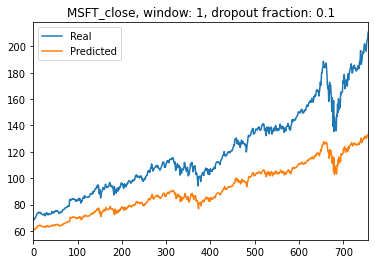

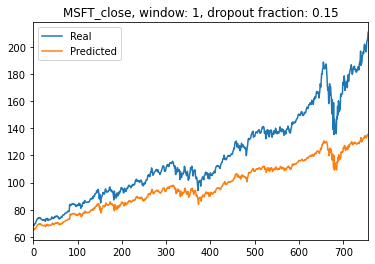

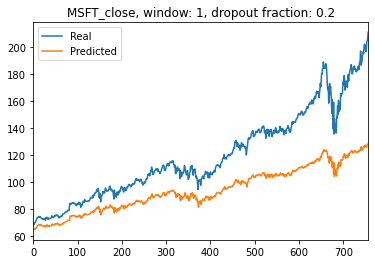

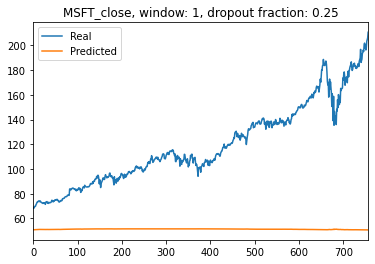

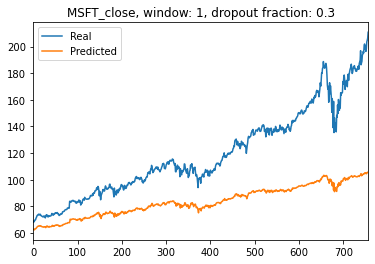

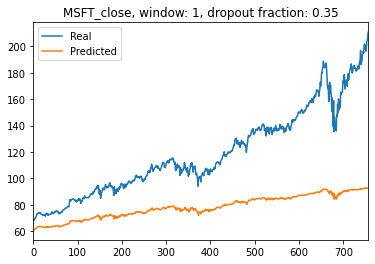

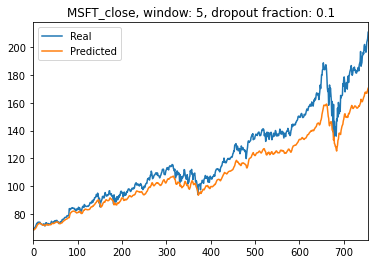

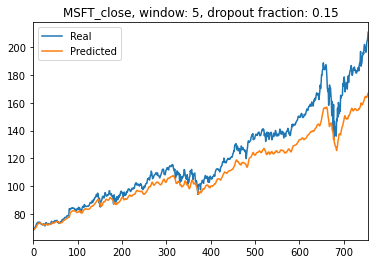

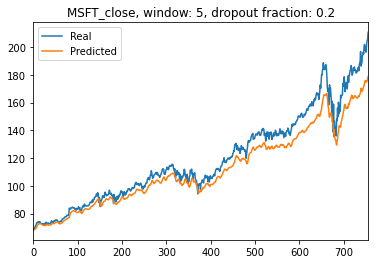

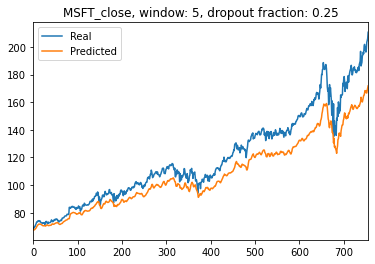

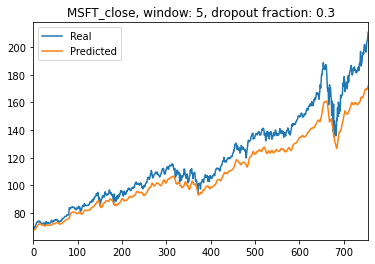

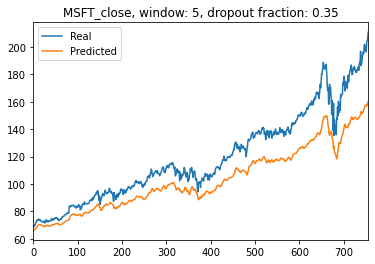

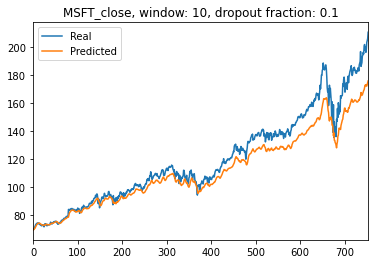

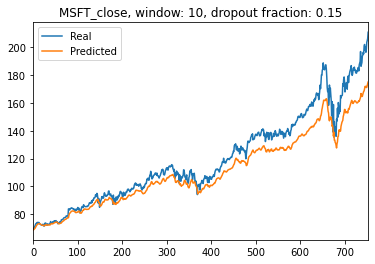

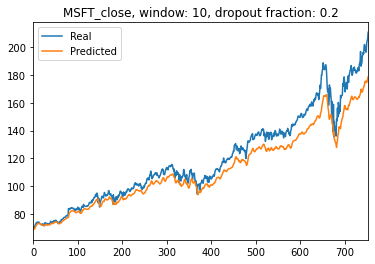

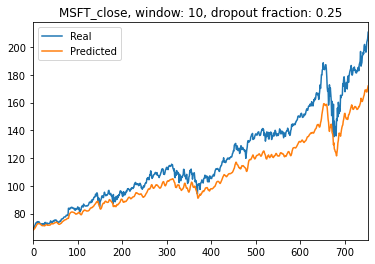

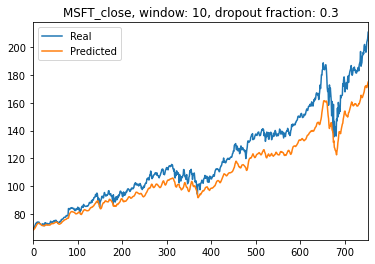

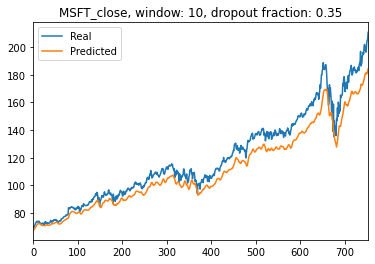

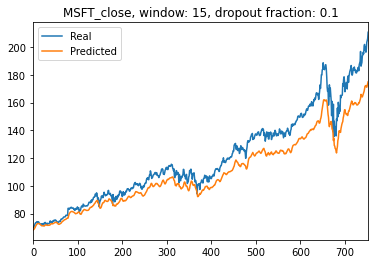

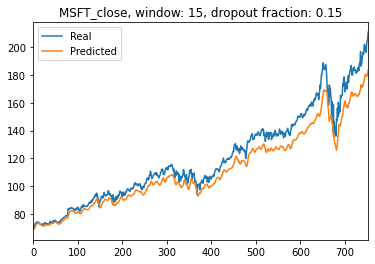

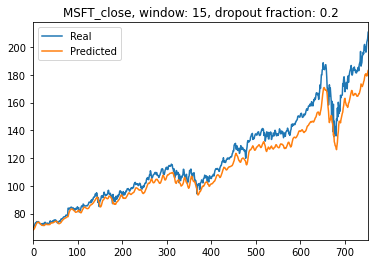

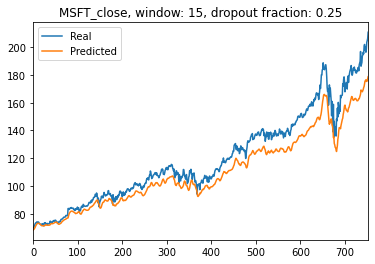

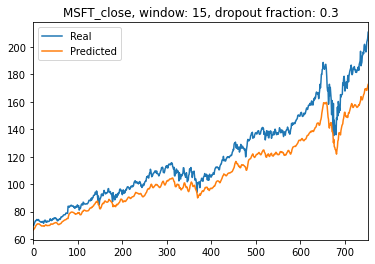

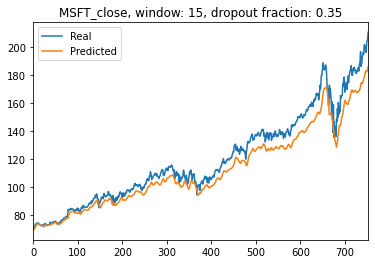

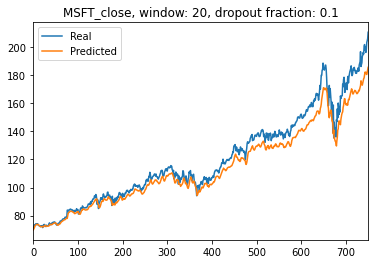

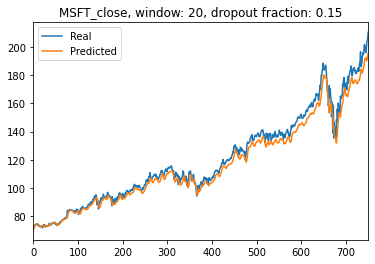

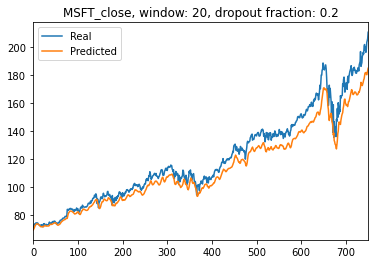

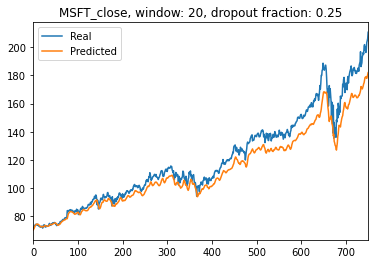

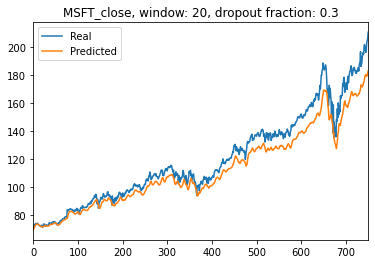

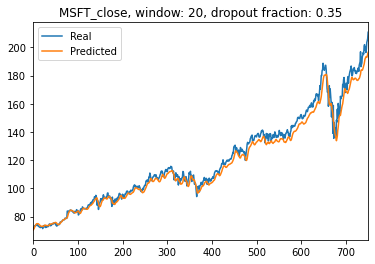

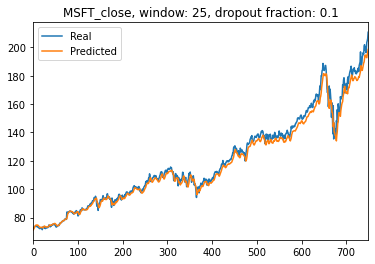

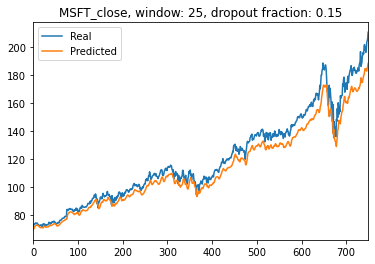

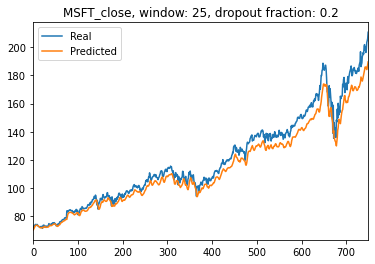

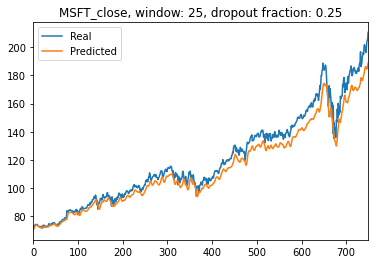

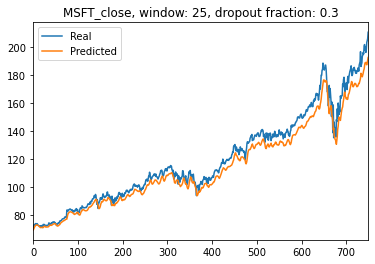

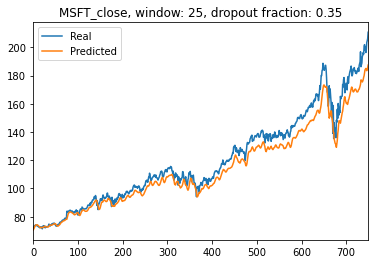

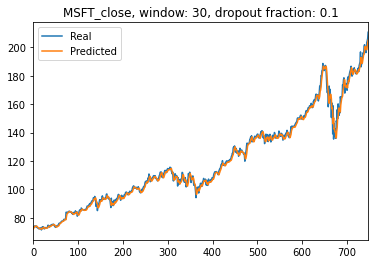

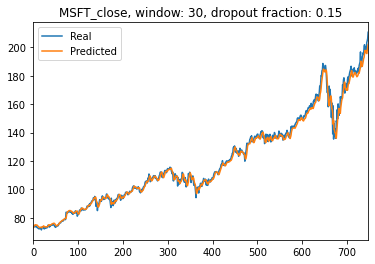

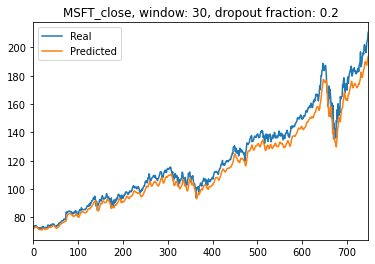

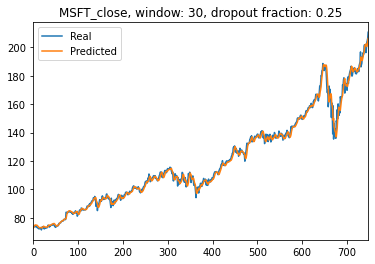

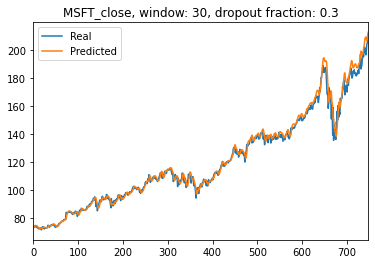

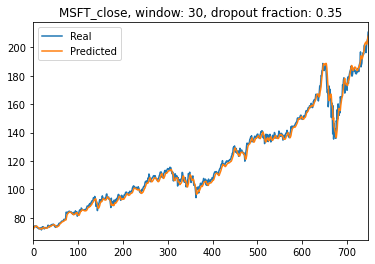

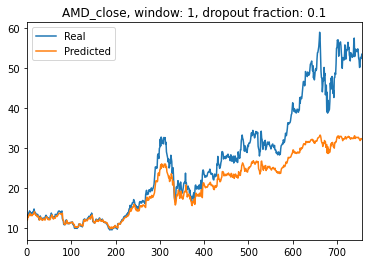

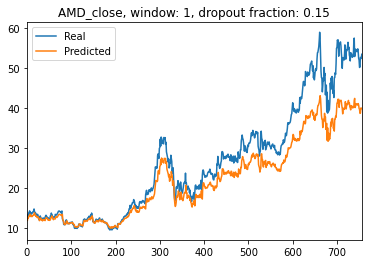

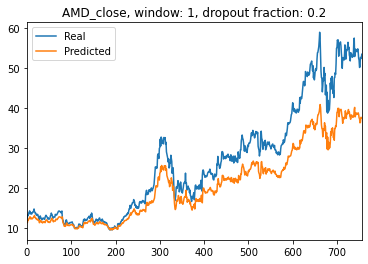

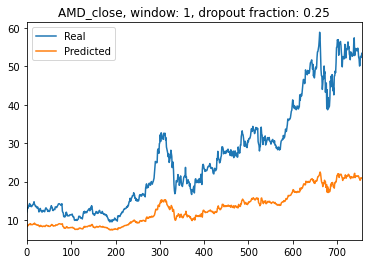

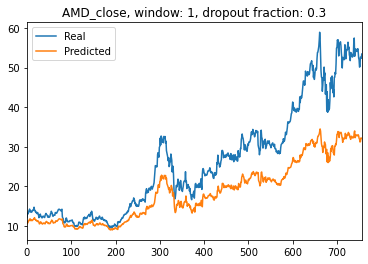

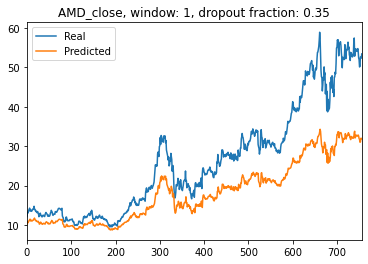

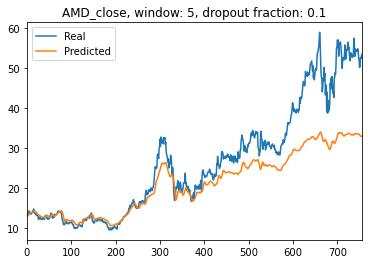

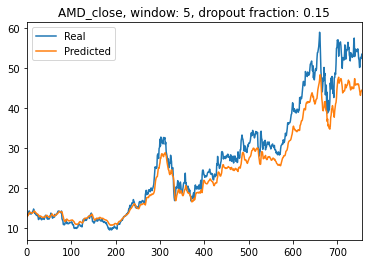

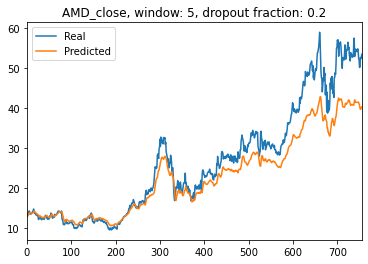

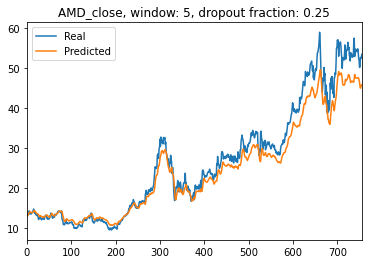

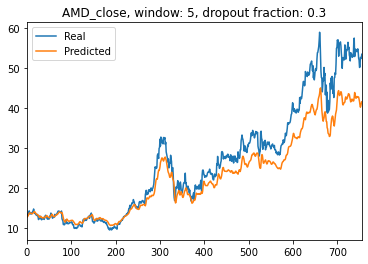

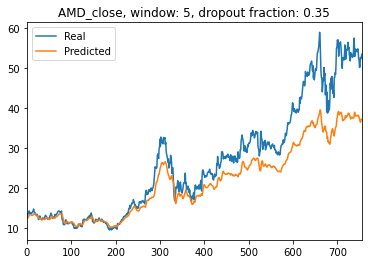

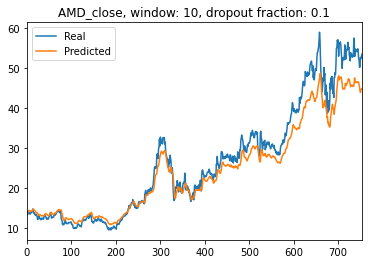

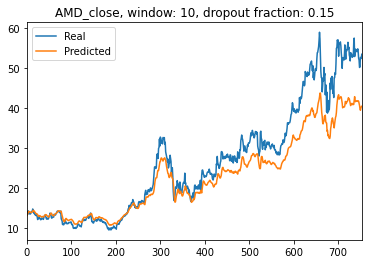

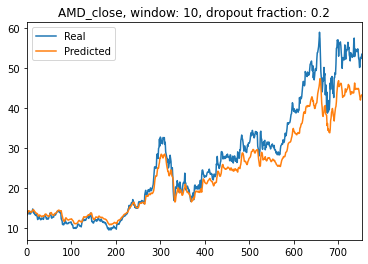

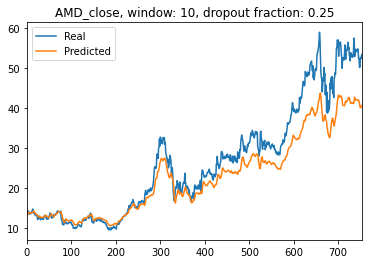

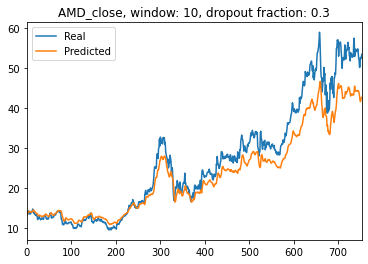

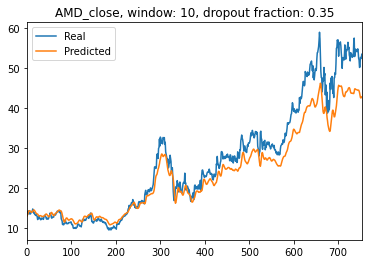

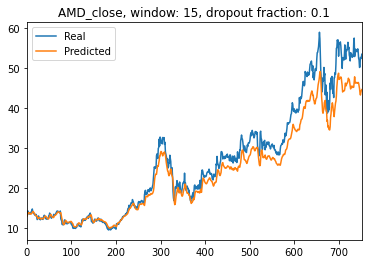

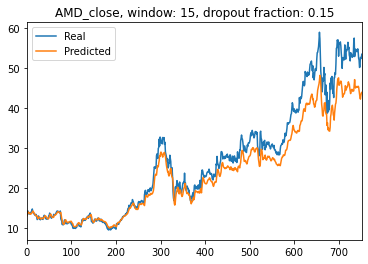

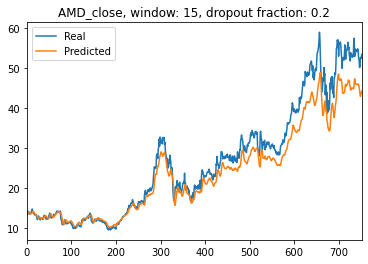

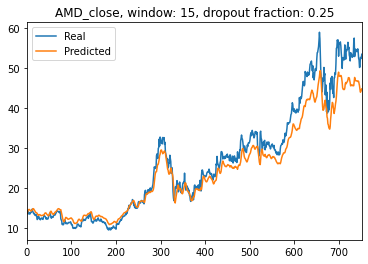

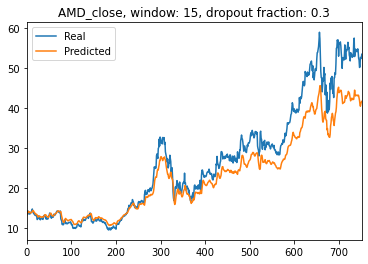

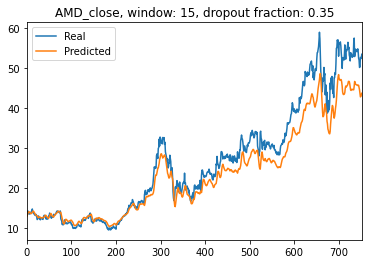

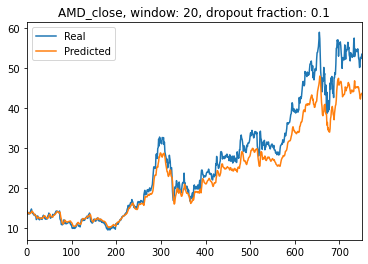

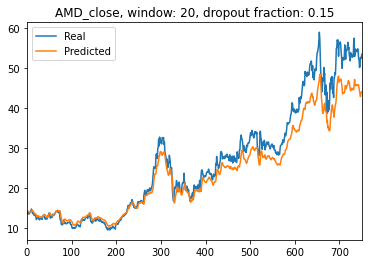

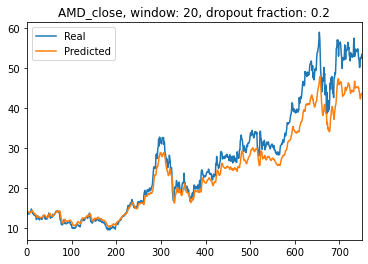

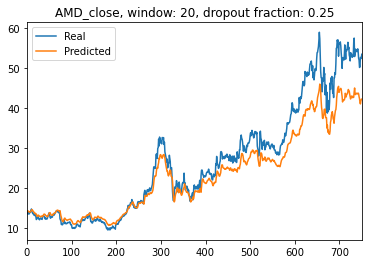

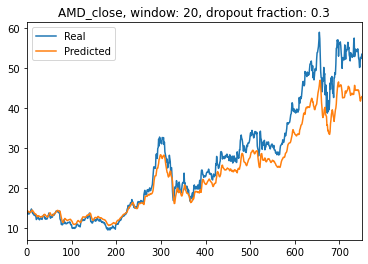

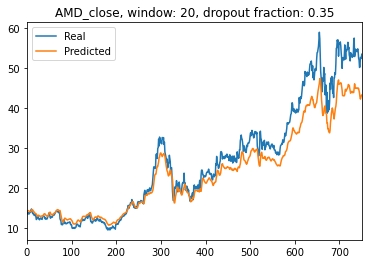

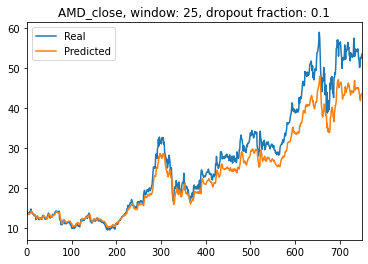

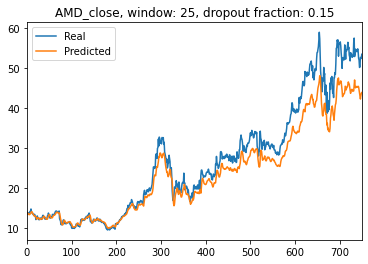

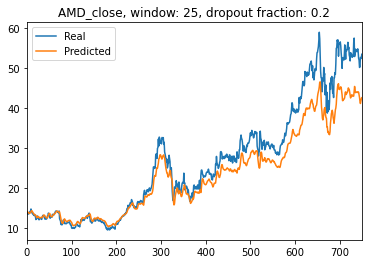

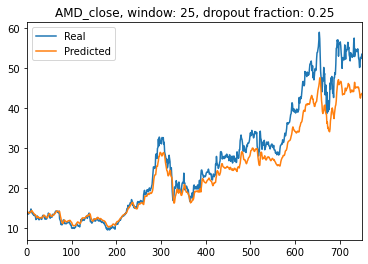

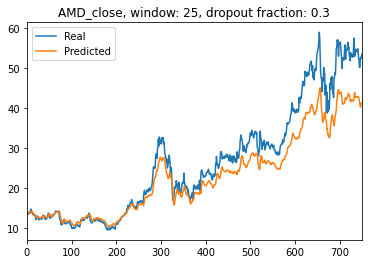

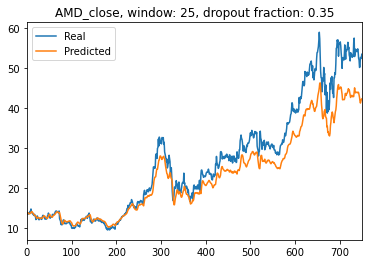

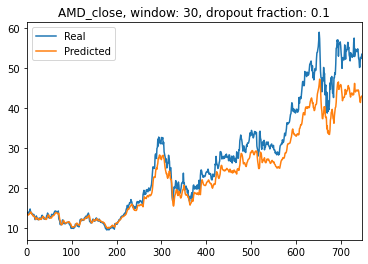

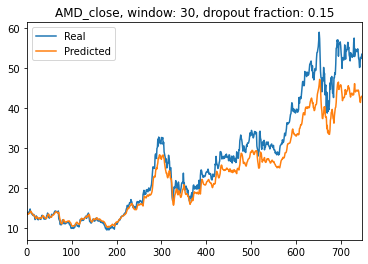

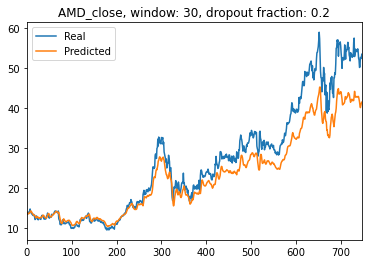

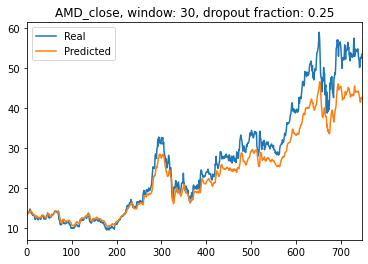

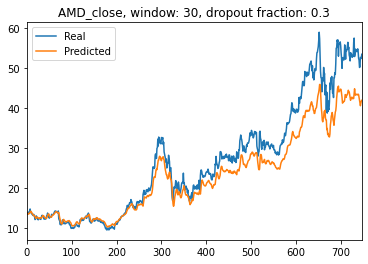

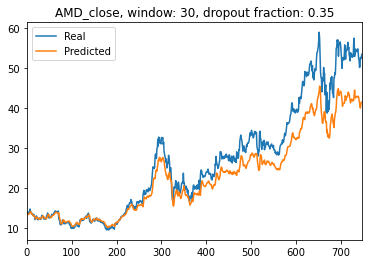

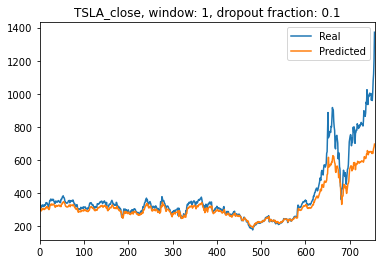

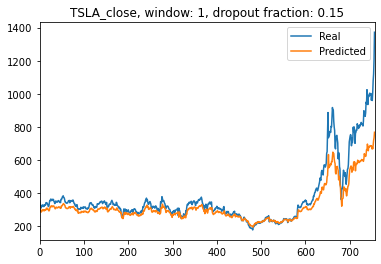

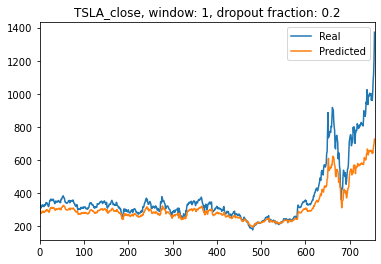

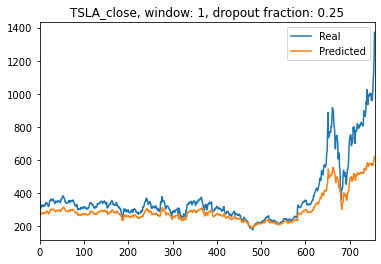

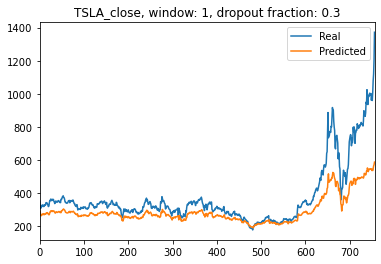

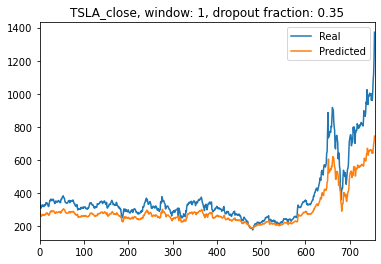

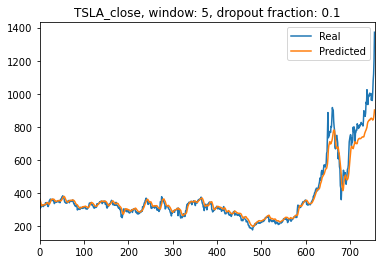

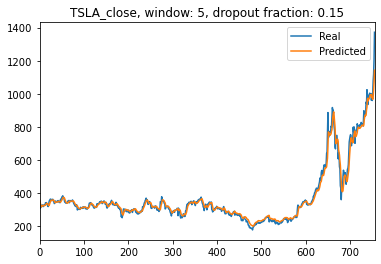

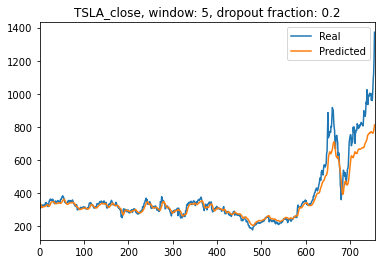

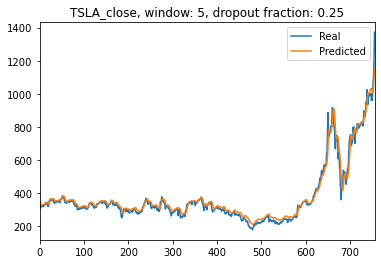

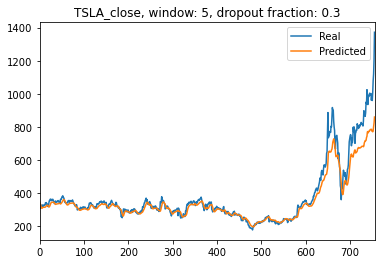

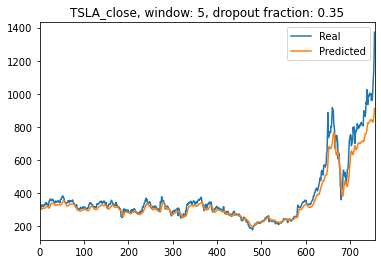

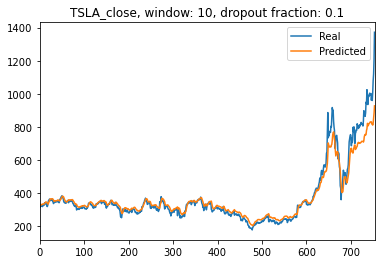

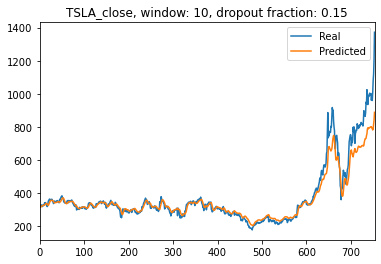

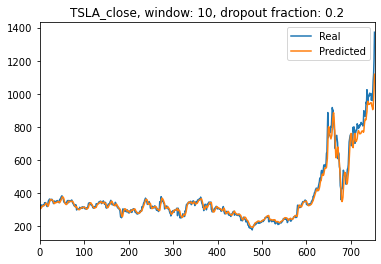

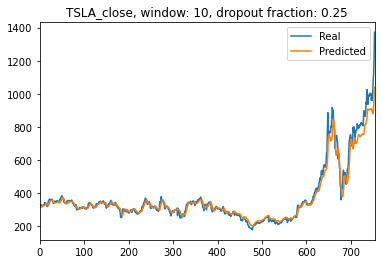

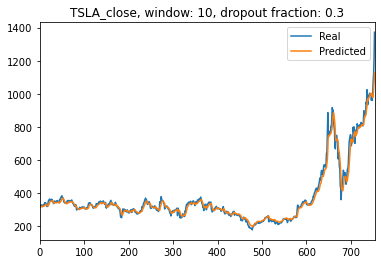

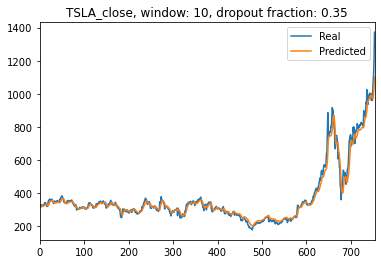

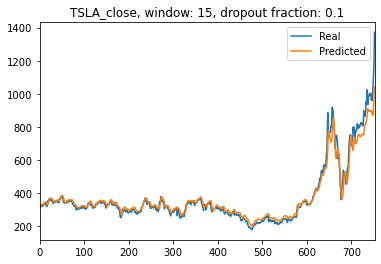

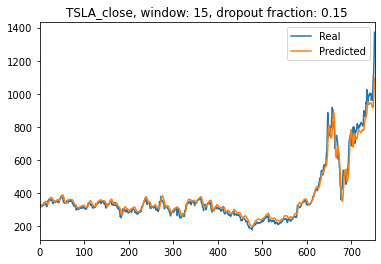

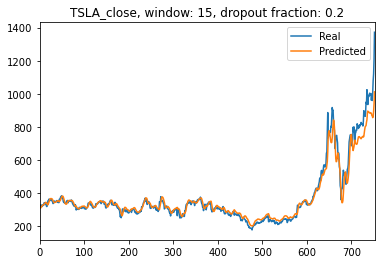

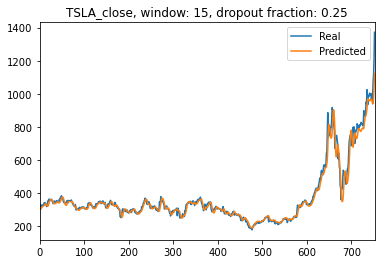

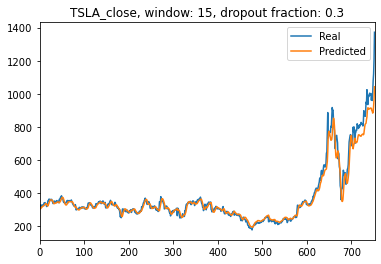

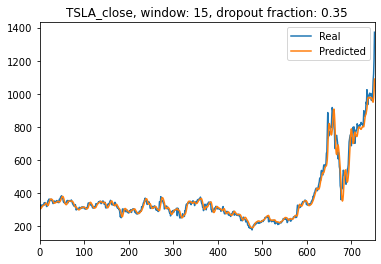

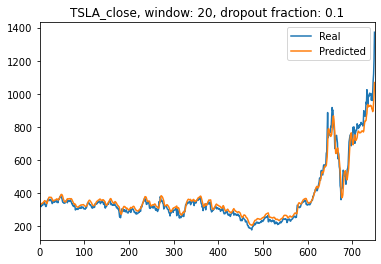

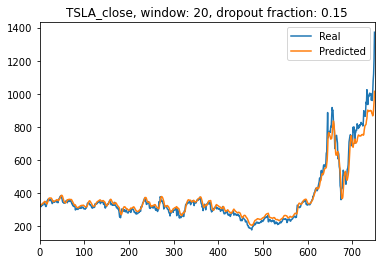

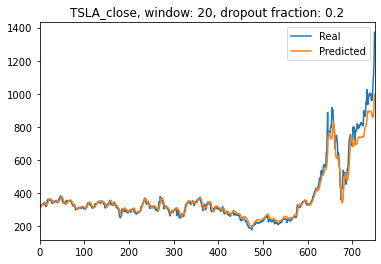

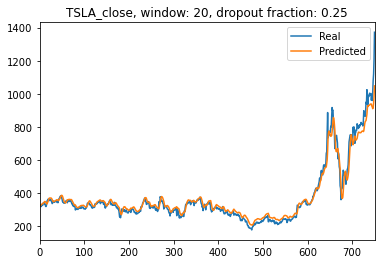

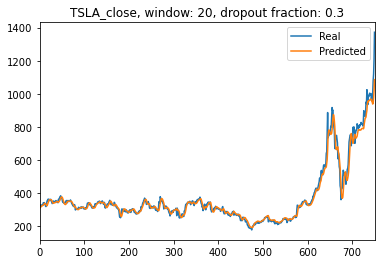

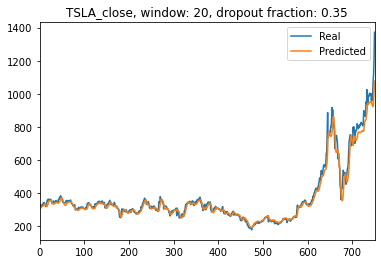

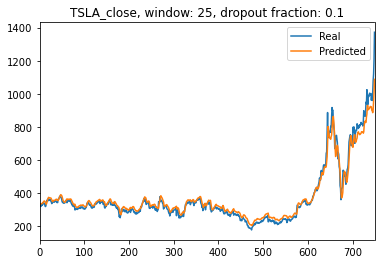

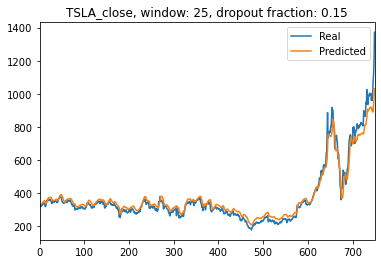

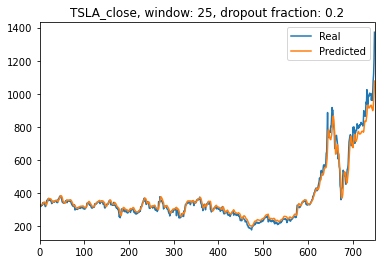

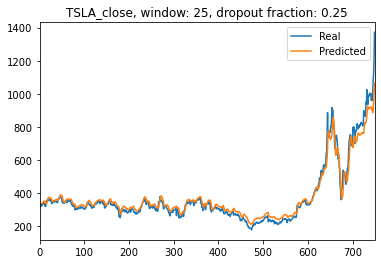

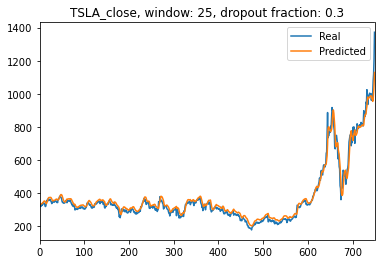

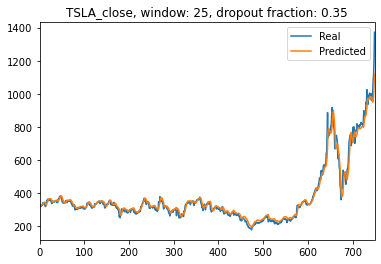

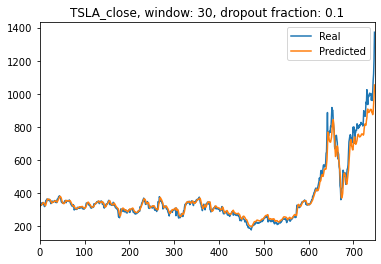

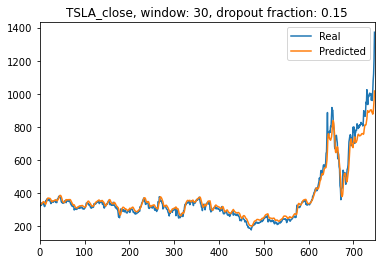

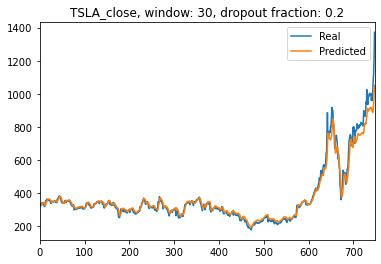

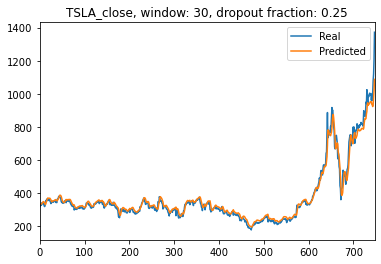

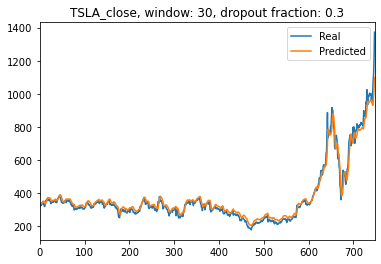

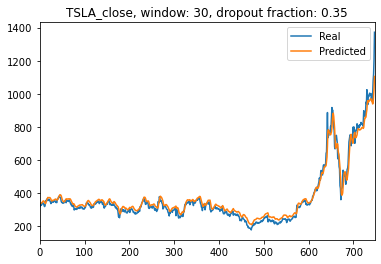

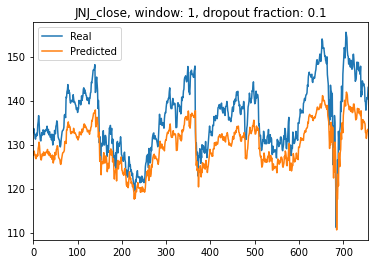

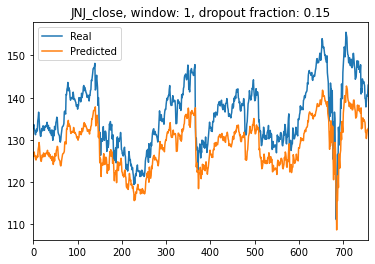

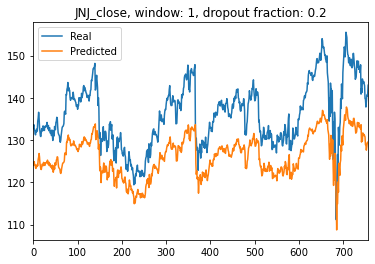

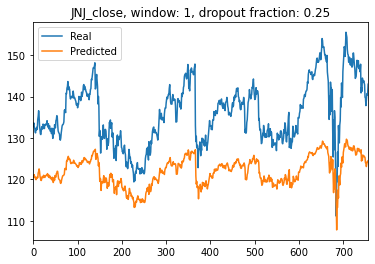

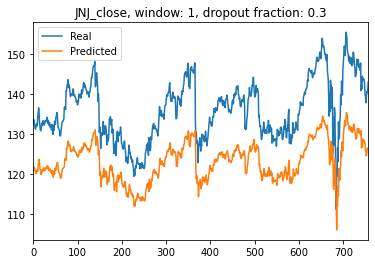

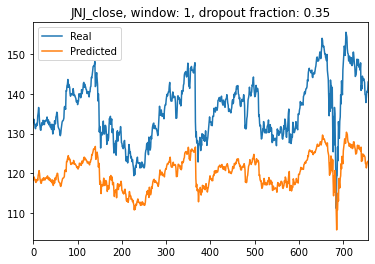

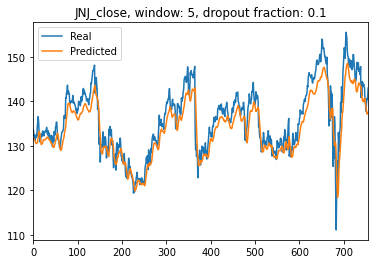

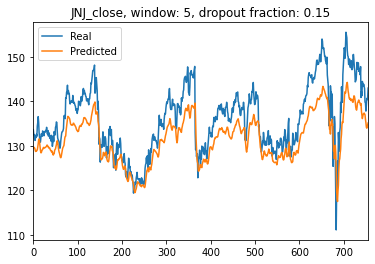

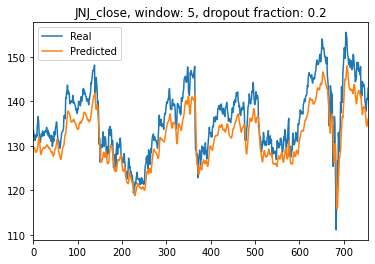

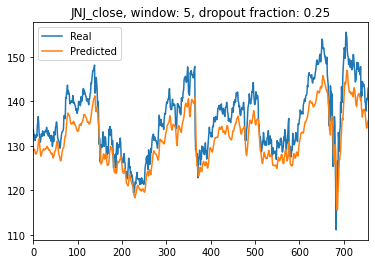

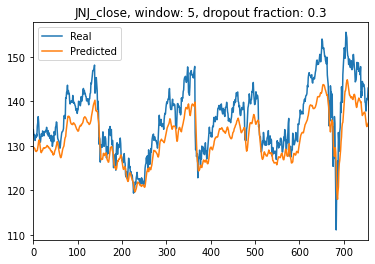

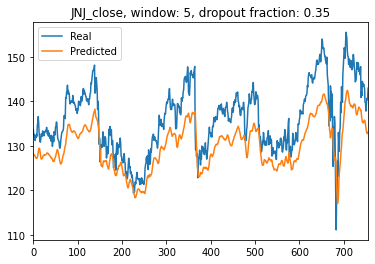

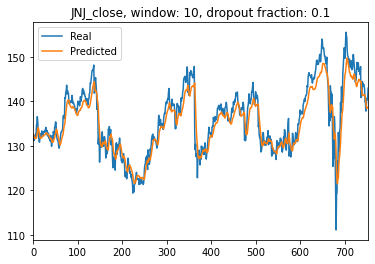

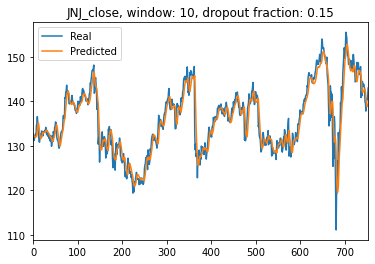

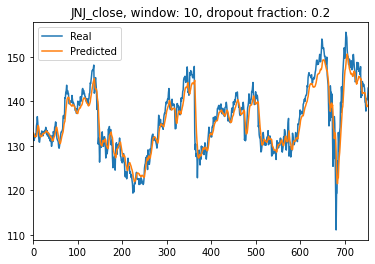

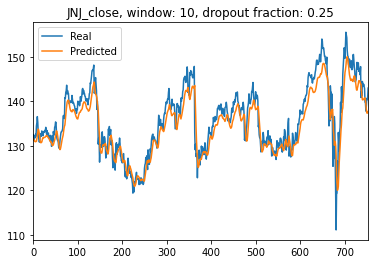

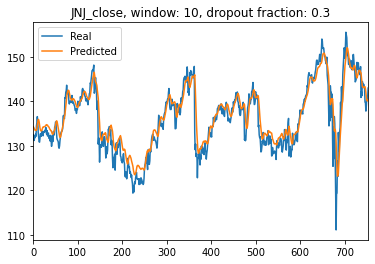

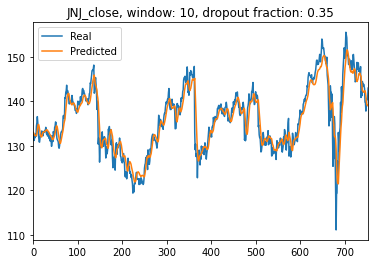

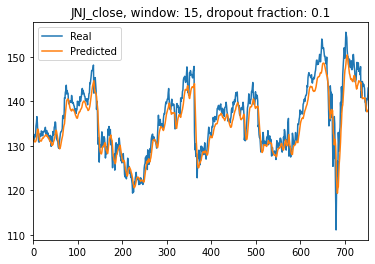

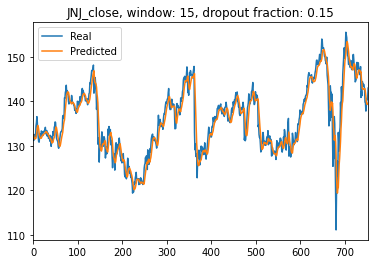

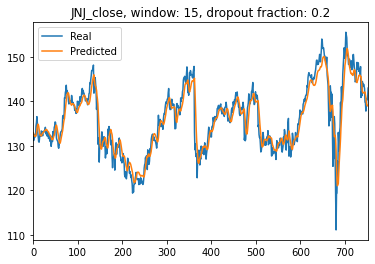

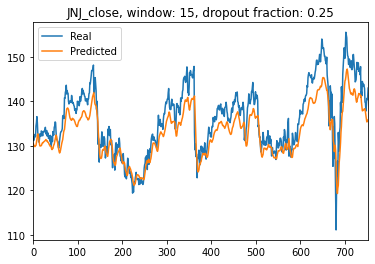

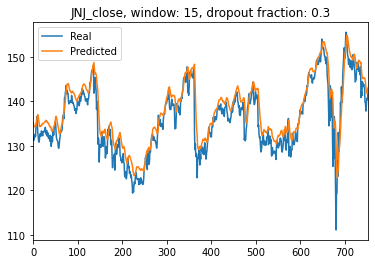

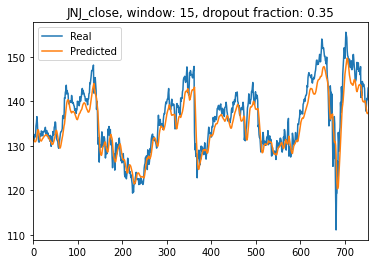

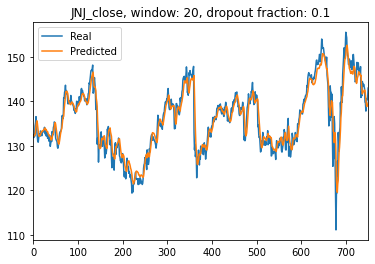

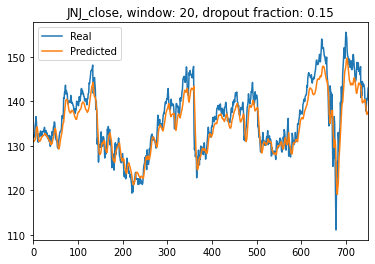

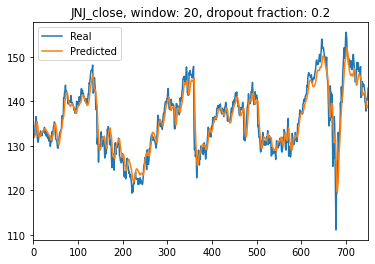

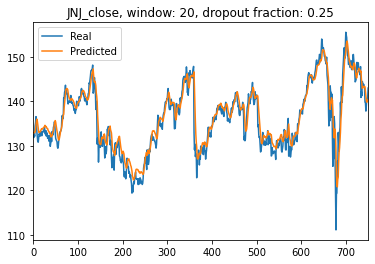

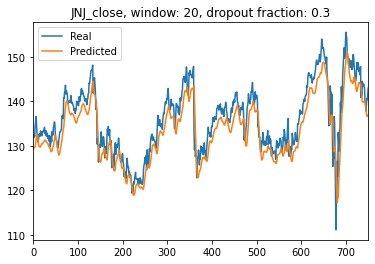

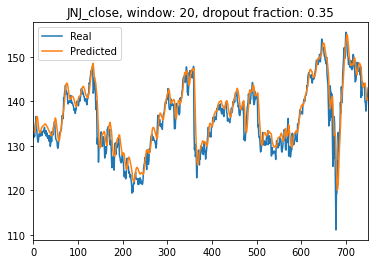

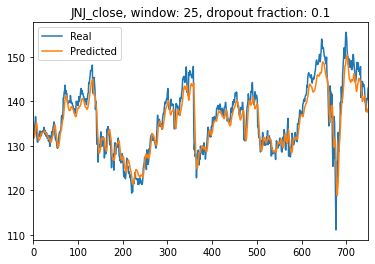

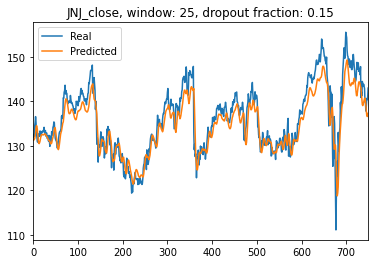

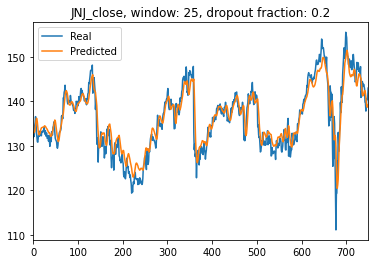

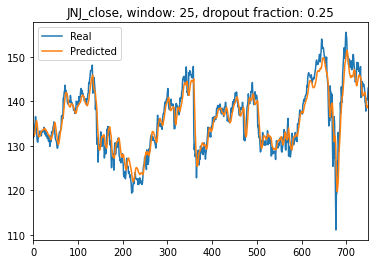

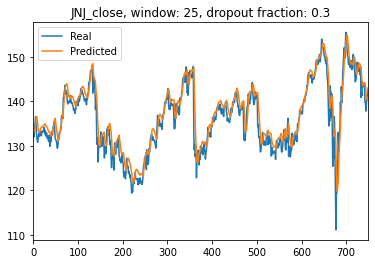

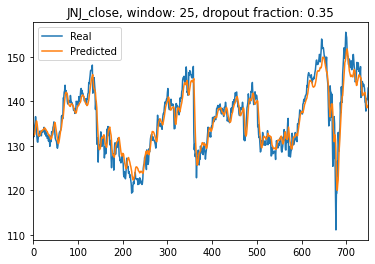

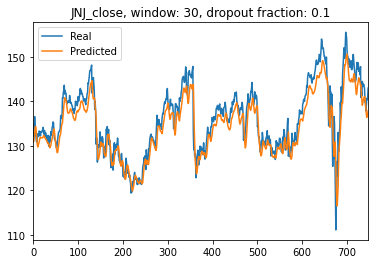

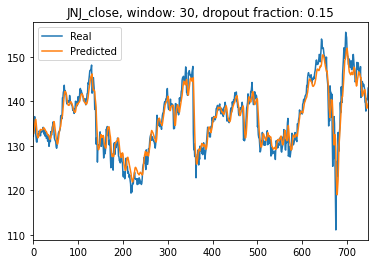

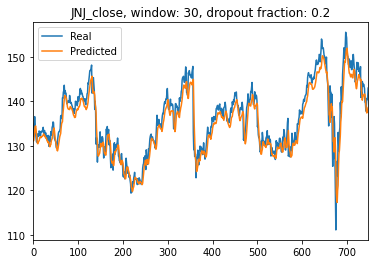

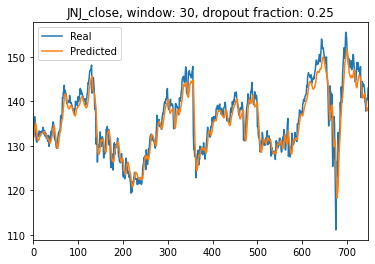

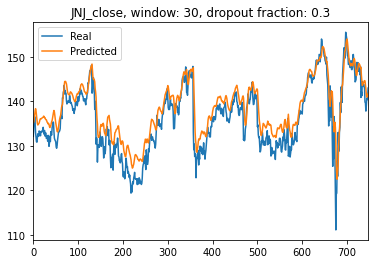

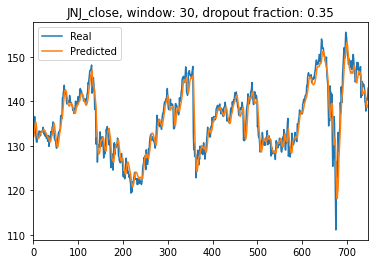

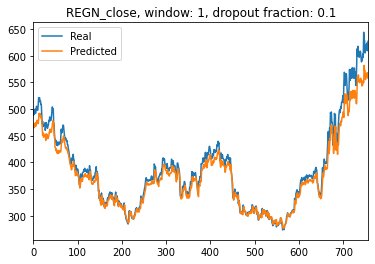

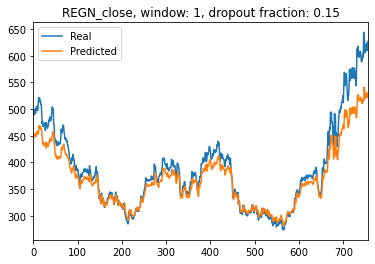

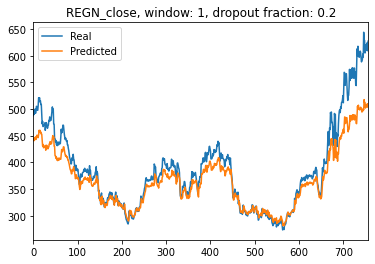

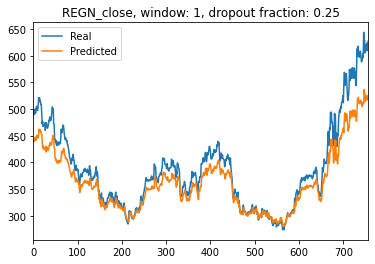

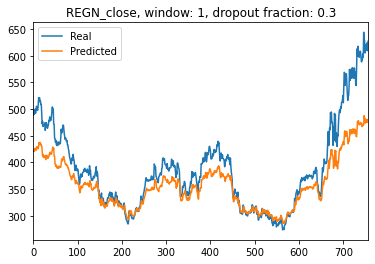

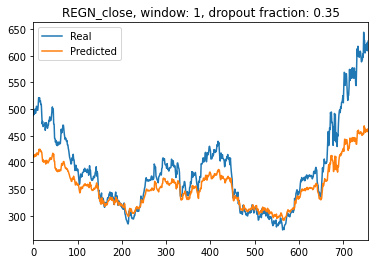

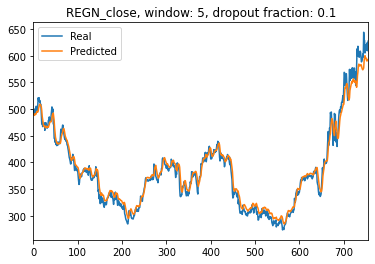

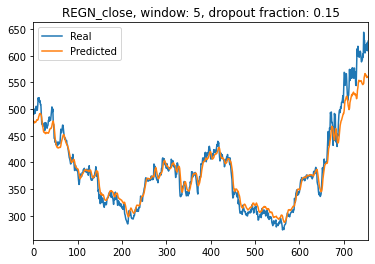

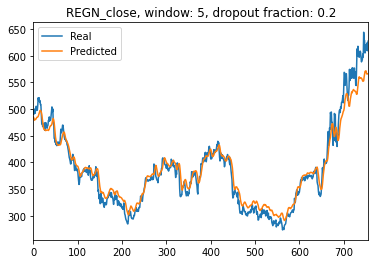

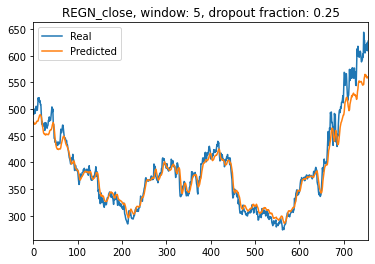

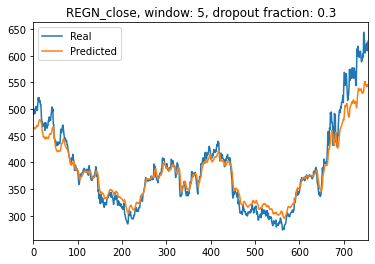

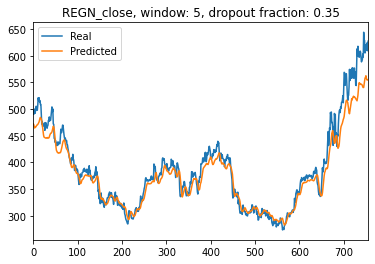

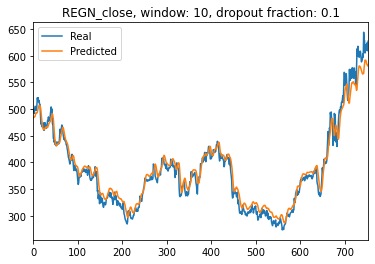

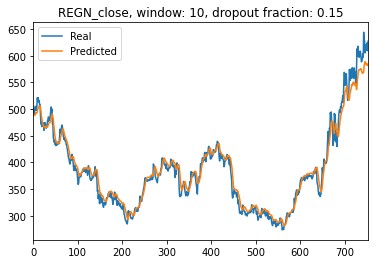

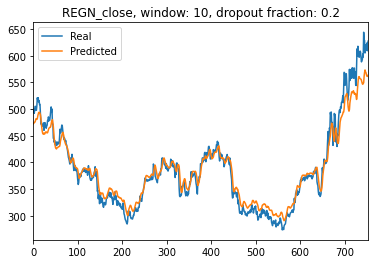

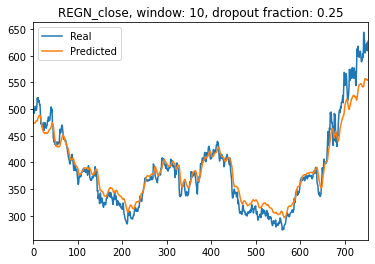

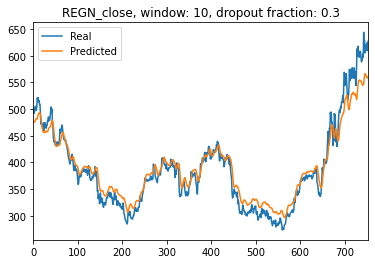

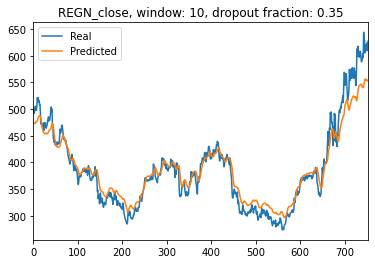

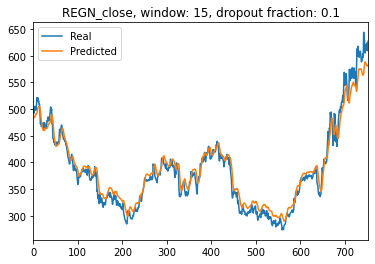

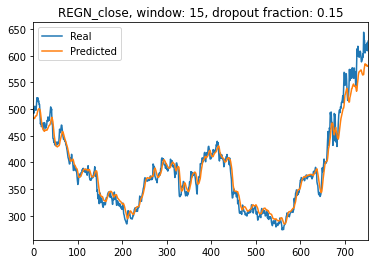

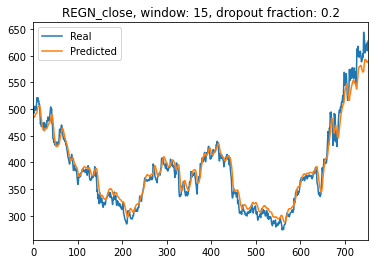

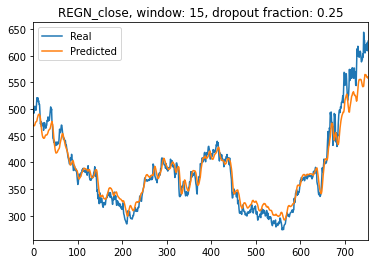

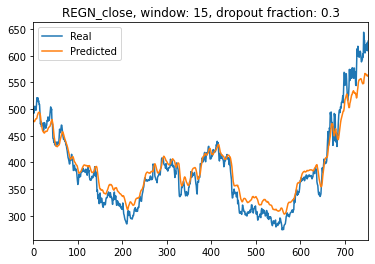

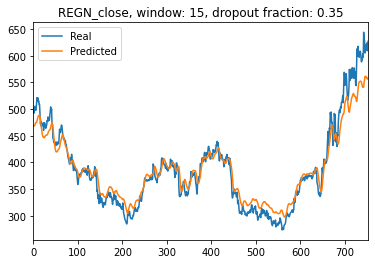

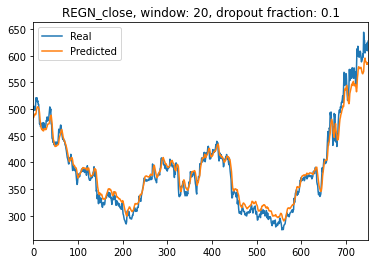

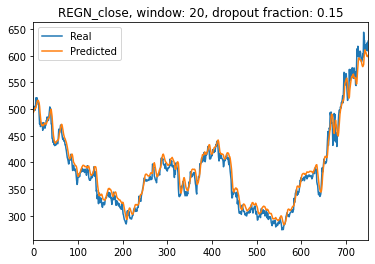

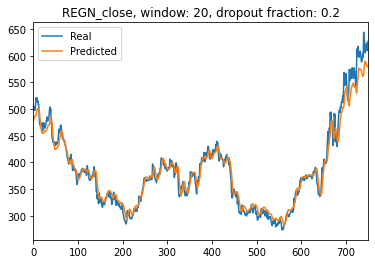

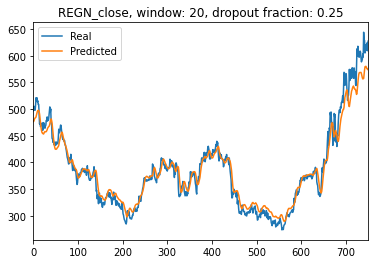

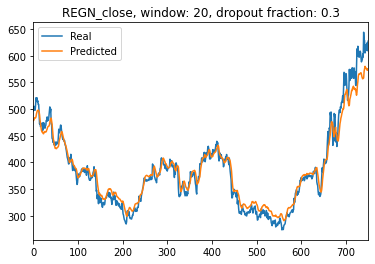

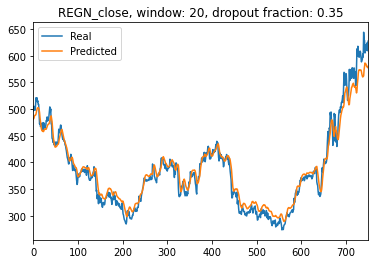

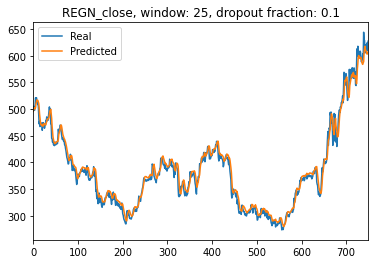

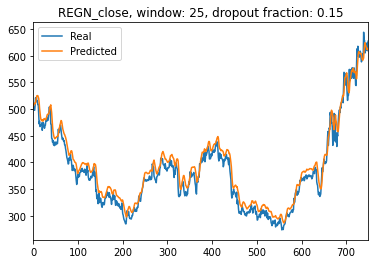

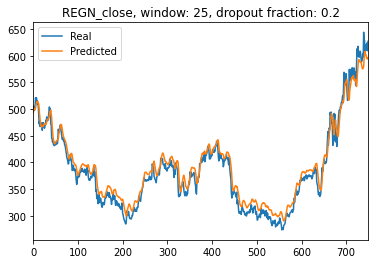

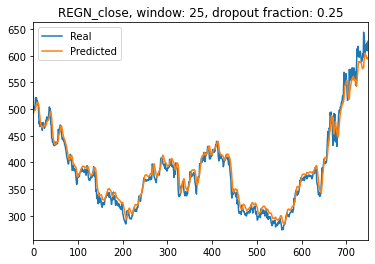

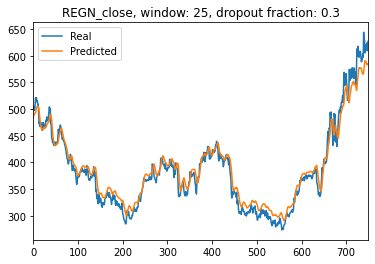

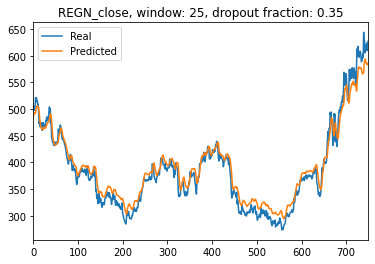

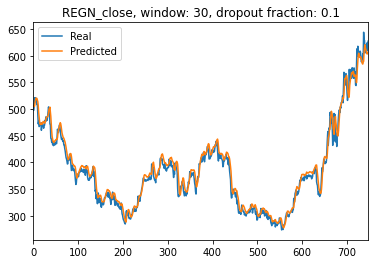

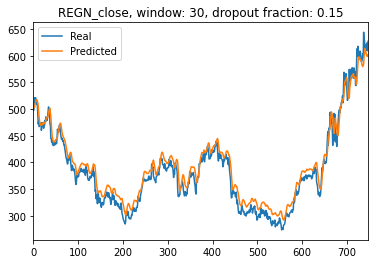

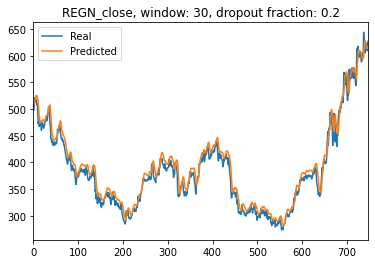

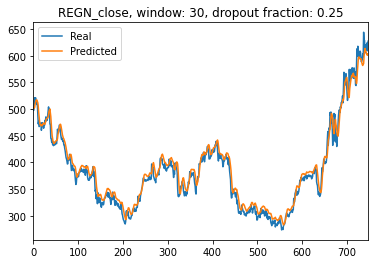

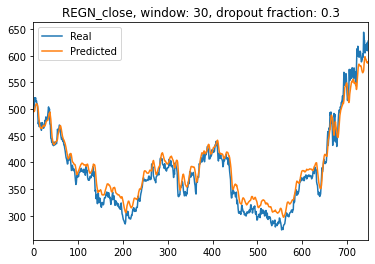

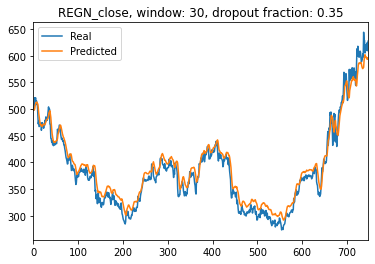

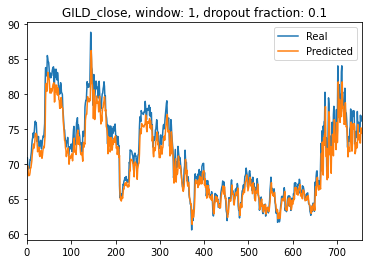

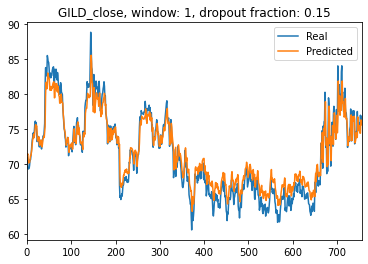

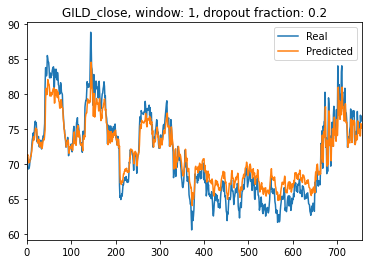

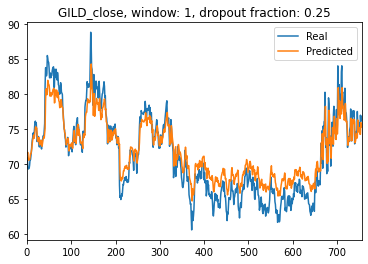

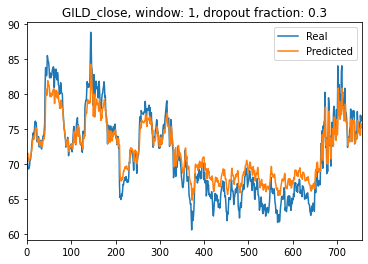

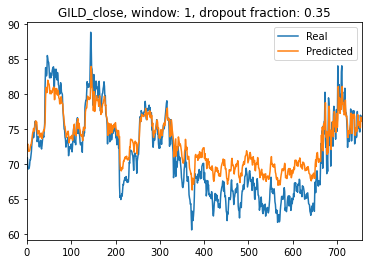

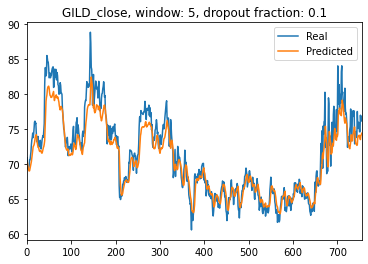

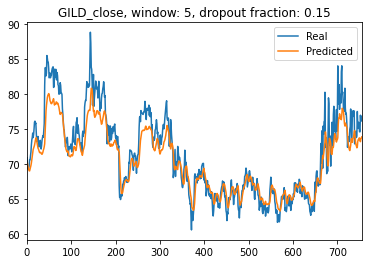

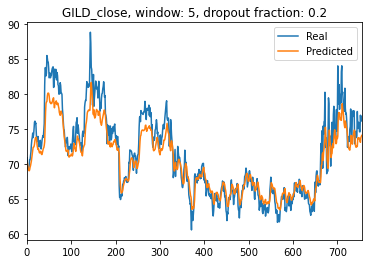

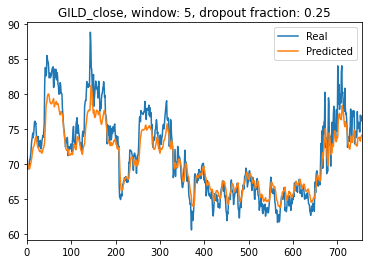

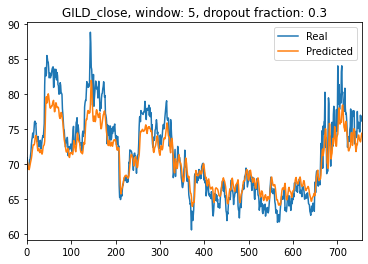

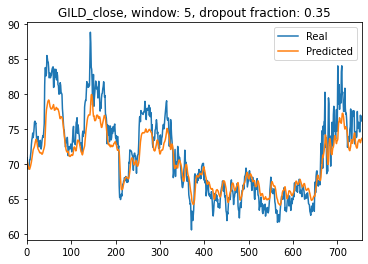

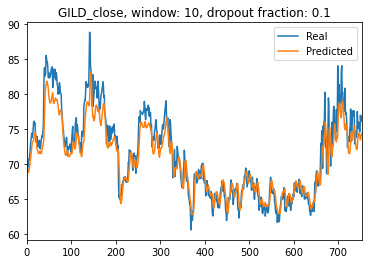

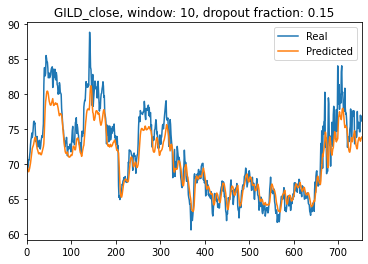

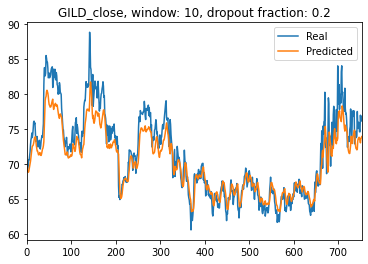

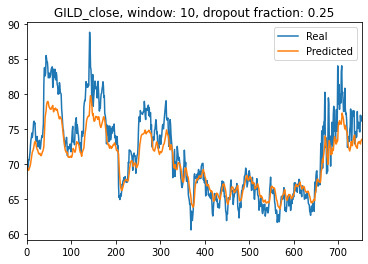

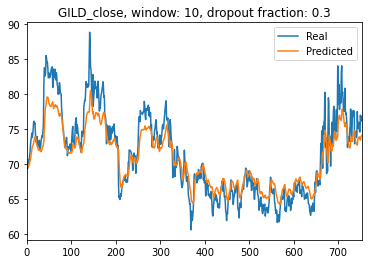

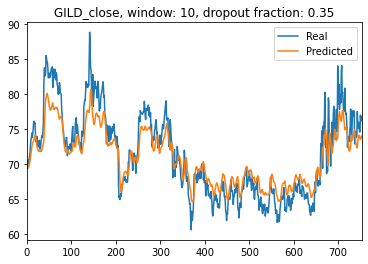

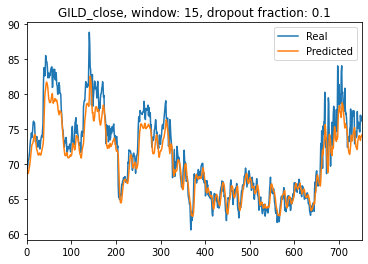

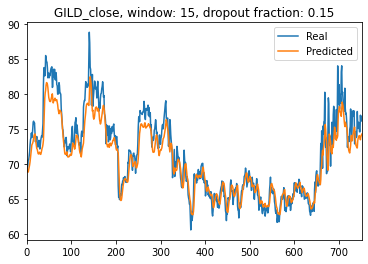

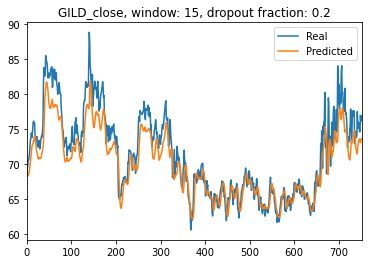

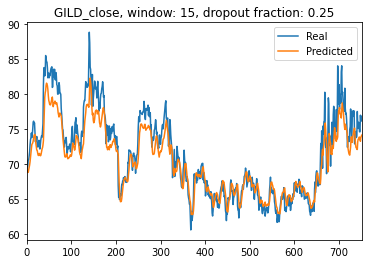

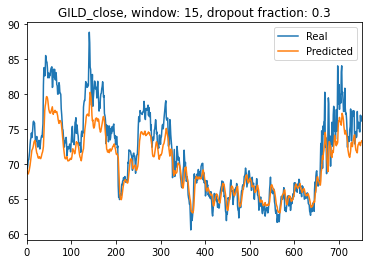

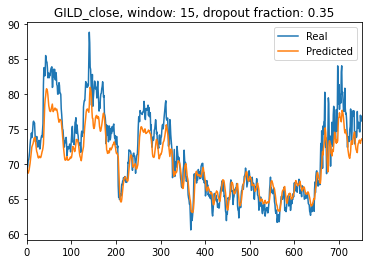

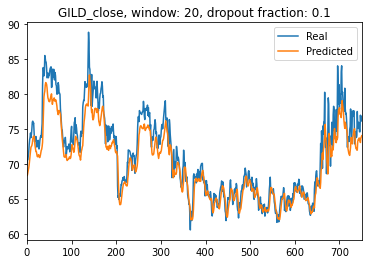

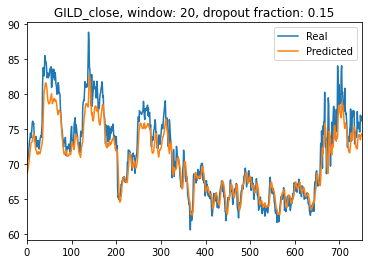

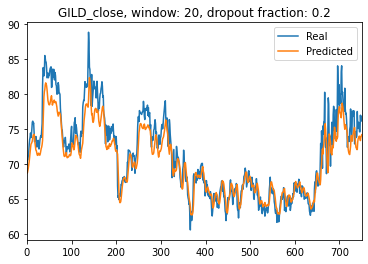

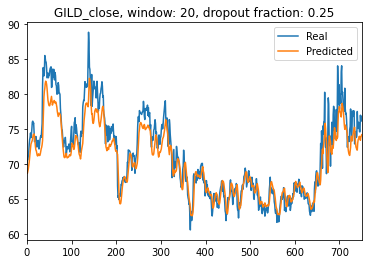

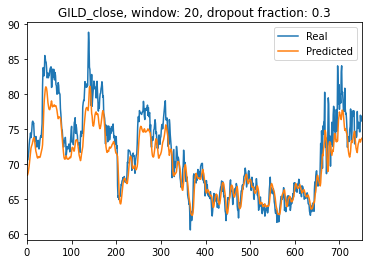

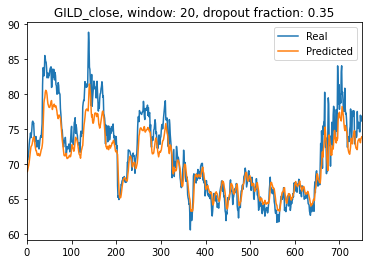

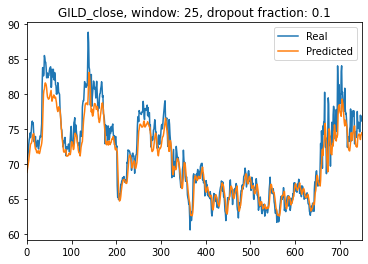

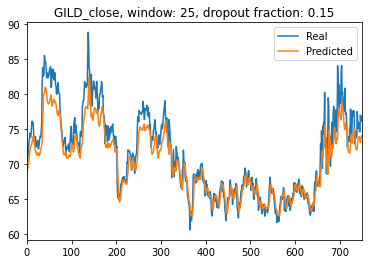

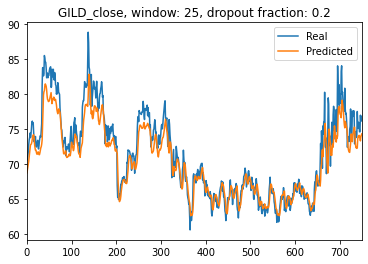

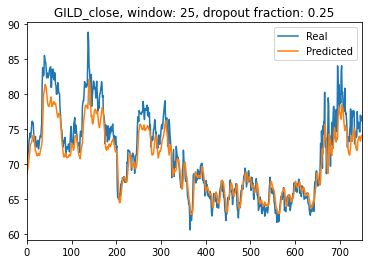

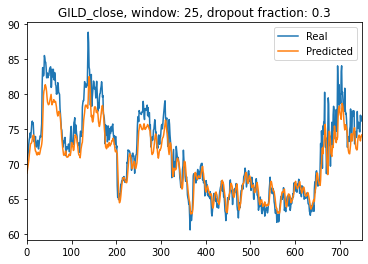

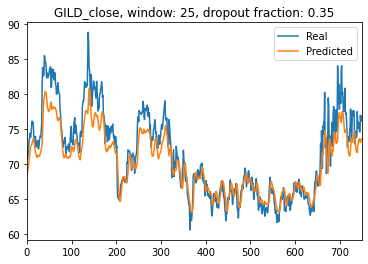

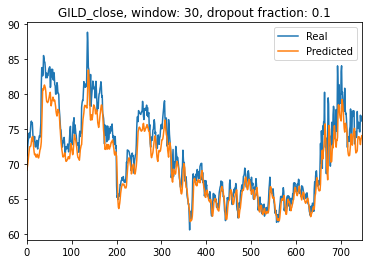

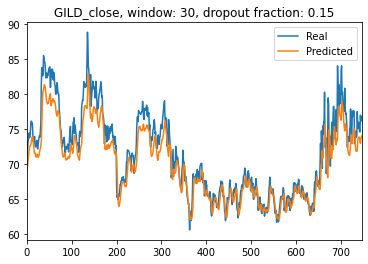

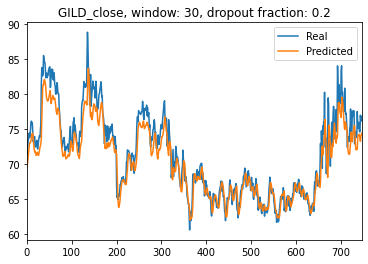

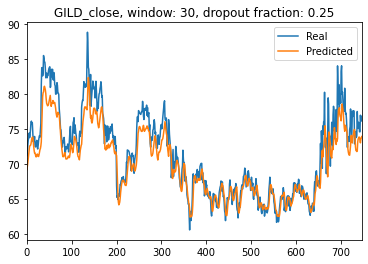

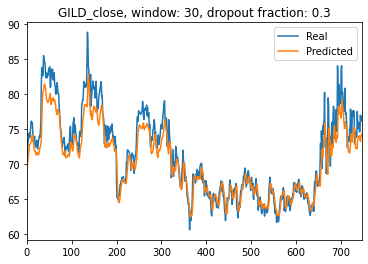

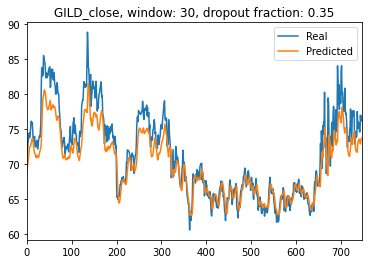

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

window_sizes = [1,5,10,15,20,25,30]
stock_list = [0,1,2,3,4,5]
dropout_fractions = [0.1,0.15,0.2,0.25,0.3,0.35]

for stock in stock_list:
    for window_size in window_sizes:
        for dropout_fraction in dropout_fractions:

            feature_column = stock # iterate over this to predict each stock in dataframe
            target_column = stock # iterate over this to predict each stock in dataframe
            X, y = window_data(df, window_size, feature_column, target_column)

            # Use 70% of the data for training and the remainder for testing
            split = int(0.7 * len(X))
            X_train = X[: split - 1]
            X_test = X[split:]
            y_train = y[: split - 1]
            y_test = y[split:]

            # Use the MinMaxScaler to scale data between 0 and 1.
            scaler = MinMaxScaler()
            scaler.fit(X)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            scaler.fit(y)
            y_train = scaler.transform(y_train)
            y_test = scaler.transform(y_test)

            # Reshape the features for the model
            X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

            # Define the LSTM RNN model.
            model = Sequential()
            # Layer 1
            model.add(LSTM(
                units=window_size,
                input_shape=(X_train.shape[1], 1))
                )
            model.add(Dropout(dropout_fraction))
            # Output layer
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Train the model
            model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=0)

            # Evaluate the model
            model.evaluate(X_test, y_test, verbose=0)

            # Make some predictions
            predicted = model.predict(X_test)

            # Recover the original prices instead of the scaled version
            predicted_prices = scaler.inverse_transform(predicted)
            real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Create a DataFrame of Real and Predicted values
            stocks = pd.DataFrame({
                "Real": real_prices.ravel(),
                "Predicted": predicted_prices.ravel()
            })
    
            # append model performance to train_test_eval dataframe
            tran_test_eval['stock'].append(df.columns[stock])
            train_test_eval['window size'].append(window_size)
            train_test_eval['dropout fraction'].append(dropout_fraction)
            train_test_eval['mse'].append(mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=True))
            train_test_eval['rmse'].append(mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=False))